#**READ ME**

**Letterboxd Dataset**

Where Was The Data Sourced?
The data was collected via webscraper on a Letterboxd List. The Letterboxd list was designed as a 'movie roulette' and has 10,002 entries ranging many genres and decades.
The data was scrapped 4/8/2025.

Full list of Fields can be viewed below but some included are:

Film Title

Average User Rating (Out of 5)

Genre

Language

Number of Ratings (Total and by star (ie. 1/2 Star, 1 Star, 1 1/2 Star))

Watches

Likes

Known Issues:
The 'Release_year' field is fully blank.
The webscraper as of posting this has a known unresolved issue pulling the release year data, that I didn't know about until after 3-4 hours of scraping. If anyone has ideas for how best to fix this issue let me know, but otherwise it will likely remain like this.

The genre data is also a little annoying to use, as its formatted as a list in each entry.


# **MOVIE DATA ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

In [2]:
Movie = pd.read_csv('/content/Movie_Data_File.csv')
Movie.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [3]:
Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null  int64  
 16  Fans               100

In [ ]:
Movie.describe()

,Release_year,Average_rating,Owner_rating,Runtime,Watches,List_appearances,Likes,Fans,½,★,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings
count,0.0,9421.000000,967.000000,9992.000000,1.000200e+04,10002.000000,1.000200e+04,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,1.000200e+04,10002.000000,1.000200e+04,1.000200e+04
mean,NaN,3.268535,2.987590,103.168335,1.702808e+05,26863.470706,4.372604e+04,1652.219256,866.564187,1836.952709,1620.666467,5587.799340,6065.947211,17883.502300,16675.451410,2.725751e+04,10408.693661,1.816795e+04,1.063710e+05
std,NaN,0.541660,0.903954,38.086110,4.584934e+05,56746.904564,1.515175e+05,9367.350484,3498.306724,5616.990616,4353.238529,13925.363975,13768.252132,43709.483476,41090.196135,8.482815e+04,38974.391426,8.322667e+04,2.947087e+05
min,NaN,1.080000,0.500000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,NaN,2.920000,2.500000,89.000000,2.975250e+03,1673.250000,4.570000e+02,2.000000,13.000000,35.000000,43.000000,145.000000,191.000000,421.250000,279.000000,2.110000e+02,36.000000,6.000000e+01,1.894250e+03
50%,NaN,3.300000,3.000000,99.000000,1.842000e+04,6502.000000,3.393000e+03,24.000000,69.000000,181.000000,207.000000,709.000000,934.000000,2422.000000,2083.500000,1.968500e+03,405.000000,5.720000e+02,1.181350e+04
75%,NaN,3.650000,3.500000,113.000000,1.083332e+05,23899.000000,2.010050e+04,283.000000,430.000000,1082.500000,1156.000000,4036.000000,4995.250000,12720.250000,11159.000000,1.314425e+04,3447.250000,4.580750e+03,6.738000e+04
max,NaN,4.710000,5.000000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,108054.000000,176637.000000,113594.000000,243192.000000,192778.000000,629879.000000,556946.000000,1.146204e+06,642986.000000,2.010363e+06,4.091037e+06


In [ ]:
Movie.columns

Index(['Film_title', 'Release_year', 'Director', 'Cast', 'Average_rating',
       'Owner_rating', 'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL'],
      dtype='object')

# **DATA PREPROCESSING**

In [6]:
Movie['Average_rating'].fillna(Movie['Average_rating'].mean(), inplace=True)
Movie['Owner_rating'].fillna(Movie['Owner_rating'].mean(), inplace=True)
Movie['Runtime'].fillna(Movie['Runtime'].mean(), inplace=True)
Movie = Movie.drop('Release_year', axis=1)

<ipython-input-6-eacafd5a2848>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Movie['Average_rating'].fillna(Movie['Average_rating'].mean(), inplace=True)
<ipython-input-6-eacafd5a2848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
Movie.isnull().sum()

,0
Film_title,0
Director,10
Cast,57
Average_rating,0
Owner_rating,0
Genres,24
Runtime,0
Countries,118
Original_language,3
Spoken_languages,3


In [ ]:
Movie['Genres'].nunique()
### 2396

2396

In [ ]:
Movie['Cast'].nunique()
### 9878

9878

In [ ]:
Movie['Spoken_languages'].nunique()
### 891

891

In [7]:
# Convert genre strings to lists
Movie['Genres'] = Movie['Genres'].dropna()

# Convert engagement metrics to numeric
for col in ['Watches', 'Likes', 'Fans']:
    Movie[col] = pd.to_numeric(Movie[col], errors='coerce')

# Check for missing values
Movie[['Average_rating', 'Watches', 'Likes', 'Fans']].isna().sum()


,0
Average_rating,0
Watches,0
Likes,0
Fans,0


## **UNIVARIATE ANALYSIS**

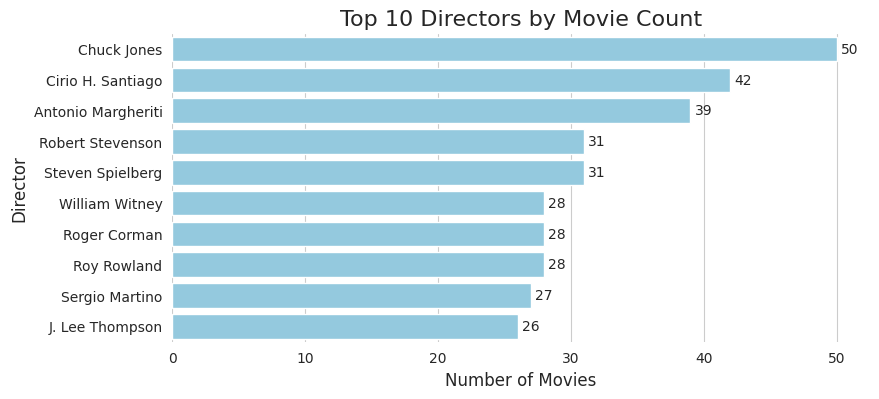

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(9, 4))
Top_10_Directors_by_Movie = sns.barplot(x=Movie['Director'].value_counts().head(10).values,
                 y=Movie['Director'].value_counts().head(10).index,
                 color='skyblue')

# Add labels and title
plt.title('Top 10 Directors by Movie Count', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Add bar labels using Seaborn's bar_label
Top_10_Directors_by_Movie.bar_label(Top_10_Directors_by_Movie.containers[0], fmt='%d', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

The above  bar chart, "**Top 10 Directors by Movie Count**," shows Chuck Jones as the most prolific with 50 movies. Cirio H. Santiago is second with 42. Other notable directors include Antonio Margheriti (39), Robert Stevenson (31), Steven Spielberg (31), and Roger Corman (28), highlighting prolific careers in film direction.

<ipython-input-13-51952f131d63>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Watches', y='Film_title', data=top_10_watched, palette='viridis')


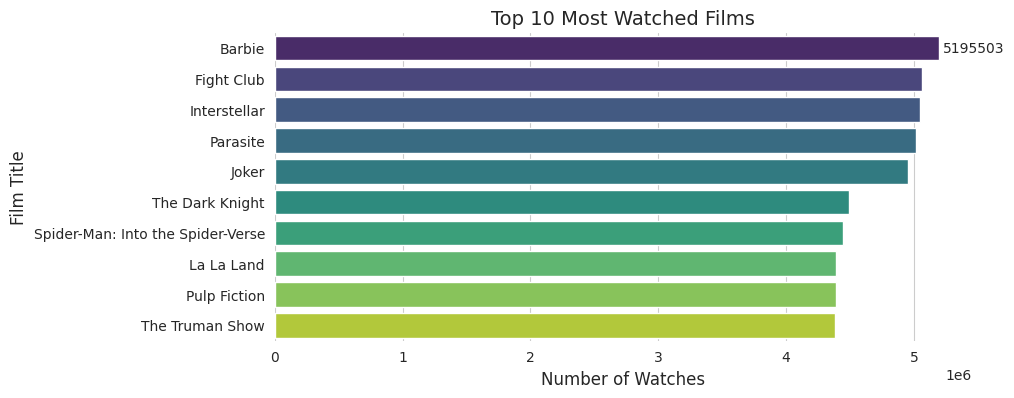

In [ ]:
# MOST WATCHED FILMS
# Sort by 'Watches' in descending order and get the top 10
top_10_watched = Movie.sort_values(by='Watches', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(9, 4))
ax = sns.barplot(x='Watches', y='Film_title', data=top_10_watched, palette='viridis')

# Add labels and title
plt.title('Top 10 Most Watched Films', fontsize=14)
plt.xlabel('Number of Watches', fontsize=12)
plt.ylabel('Film Title', fontsize=12)

# Add bar labels
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

 "**Top 10 Most Watched Films**," displays the number of watches for ten film titles. "Barbie" is the most watched film with 5,195,503 watches, followed by "Fight Club," "Interstellar," and others, down to "The Truman Show" as the tenth most watched. The films are ordered by watch count, and a color gradient is applied to the bars.

<ipython-input-14-01e580c4704d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_liked = sns.barplot(x='Likes', y='Film_title', data=top_10_liked, palette='plasma')


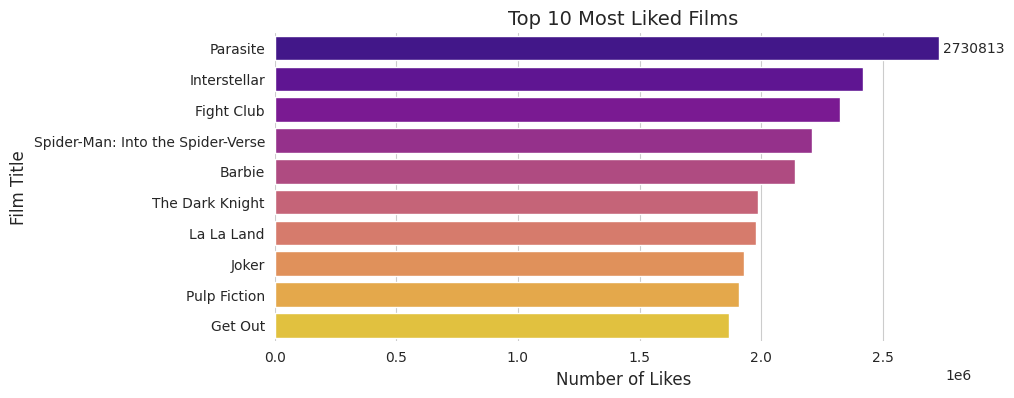

In [ ]:
# Top 10 most liked movies
top_10_liked = Movie.sort_values(by='Likes', ascending=False).head(10)

# Create the bar chart for top 10 most liked movies
plt.figure(figsize=(9, 4))
ax_liked = sns.barplot(x='Likes', y='Film_title', data=top_10_liked, palette='plasma')

# Add labels and title
plt.title('Top 10 Most Liked Films', fontsize=14)
plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Film Title', fontsize=12)

# Add bar labels
ax_liked.bar_label(ax_liked.containers[0], fmt='%d', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

"**Top 10 Most Liked Films**," shows "Parasite" as the most liked film with 2,730,813 likes. Films are ranked by likes, from "Parasite" (top) to "Get Out" (bottom), with a color gradient applied to the bars.

<ipython-input-15-d79d00f795f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_rated = sns.barplot(x='Average_rating', y='Film_title', data=top_10_rated, palette='coolwarm')


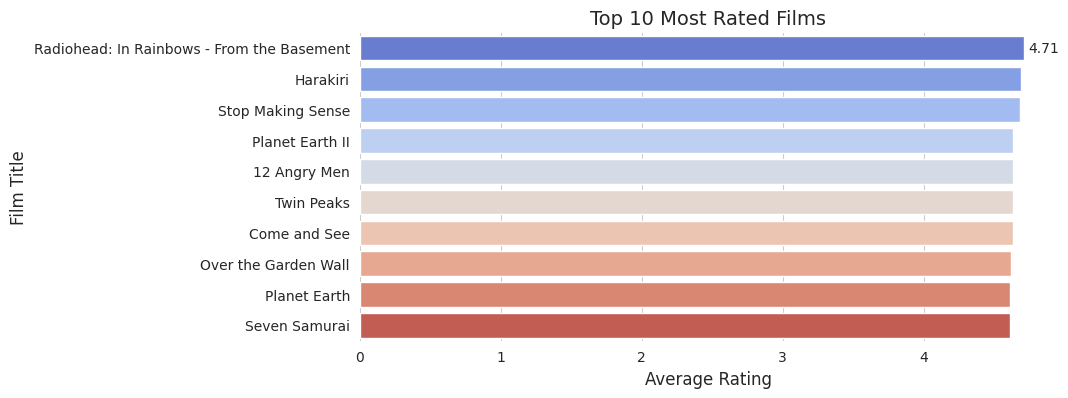

In [ ]:
# Top 10 most rated movies (based on average rating)
top_10_rated = Movie.sort_values(by='Average_rating', ascending=False).head(10)

# Create the bar chart for top 10 most rated movies
plt.figure(figsize=(9, 4))
ax_rated = sns.barplot(x='Average_rating', y='Film_title', data=top_10_rated, palette='coolwarm')

# Add labels and title
plt.title('Top 10 Most Rated Films', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Film Title', fontsize=12)

# Add bar labels
ax_rated.bar_label(ax_rated.containers[0], fmt='%.2f', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


"**Top 10 Most Rated Films,**" shows "Radiohead: In Rainbows - From the Basement" with the highest average rating of 4.71. Films are ranked by average rating, from highest (top) to lowest (bottom), with a color gradient applied to the bars.

<ipython-input-16-3f642805b215>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_director_rating = sns.barplot(x=top_directors_by_rating.values, y=top_directors_by_rating.index, palette='viridis')


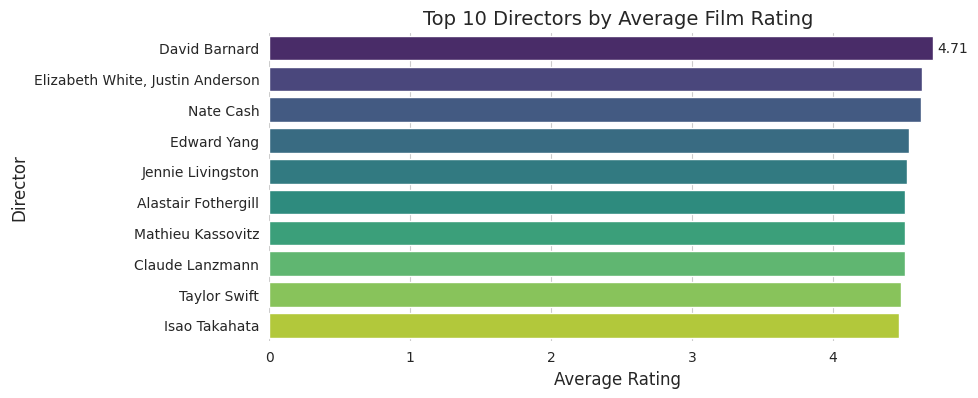

In [ ]:
# Group by Director and calculate the mean of Average_rating, then sort
top_directors_by_rating = Movie.groupby('Director')['Average_rating'].mean().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(9, 4))
ax_director_rating = sns.barplot(x=top_directors_by_rating.values, y=top_directors_by_rating.index, palette='viridis')

# Add labels and title
plt.title('Top 10 Directors by Average Film Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Add bar labels
ax_director_rating.bar_label(ax_director_rating.containers[0], fmt='%.2f', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

"**Top 10 Directors by Average Film Rating**," shows "David Barnard" with the highest average film rating of 4.71. Directors are ranked by average rating, from highest (top) to lowest (bottom), with a color gradient applied to the bars.

<ipython-input-17-770bde0187a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_director_watches = sns.barplot(x=top_directors_by_watches.values, y=top_directors_by_watches.index, palette='mako')


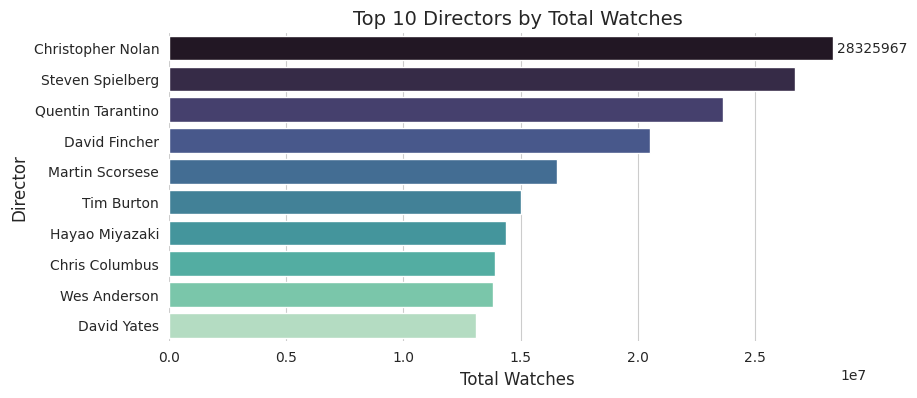

In [ ]:
# Group by Director and sum the 'Watches', then sort
top_directors_by_watches = Movie.groupby('Director')['Watches'].sum().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(9, 4))
ax_director_watches = sns.barplot(x=top_directors_by_watches.values, y=top_directors_by_watches.index, palette='mako')

# Add labels and title
plt.title('Top 10 Directors by Total Watches', fontsize=14)
plt.xlabel('Total Watches', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Add bar labels
ax_director_watches.bar_label(ax_director_watches.containers[0], fmt='%d', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

"**Top 10 Directors by Total Watches**," shows "Christopher Nolan" with the highest total watches at 28,325,967. Directors are ranked by total watches from highest (top) to lowest (bottom), with a color gradient applied to the bars.

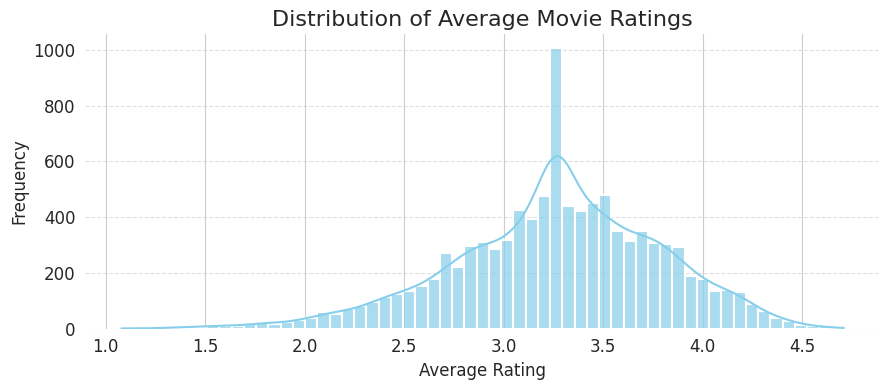

In [ ]:
# Distribution of Average Rating
plt.figure(figsize=(9, 4))  # Adjust figure size for better proportions
sns.histplot(Movie['Average_rating'], kde=True, color='skyblue',
              linewidth=1.5, alpha=0.7)  # Enhance bars
plt.title('Distribution of Average Movie Ratings', fontsize=16)  # Bold title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)  # Increase tick label size
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In the above graph, the distribution is unimodal and approximately bell-shaped, with a peak around 3.0 to 3.5, indicating that most movies have average ratings in this range. The curve is slightly skewed to the left, suggesting a few movies have lower average ratings, but most cluster around the center.

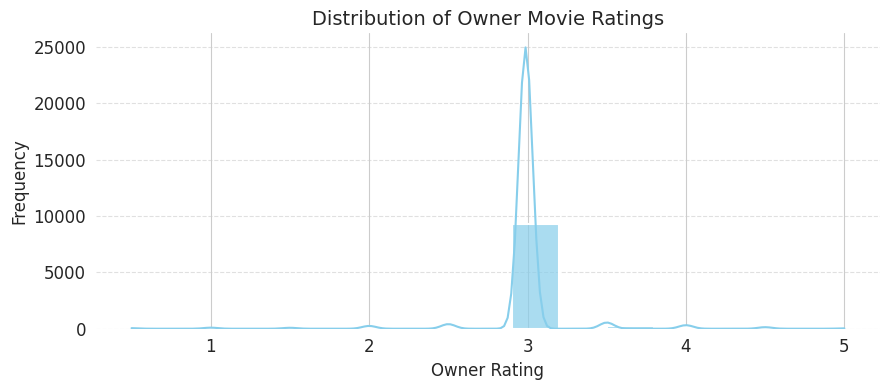

In [ ]:
# Distribution of Owner Rating
plt.figure(figsize=(9, 4))  # Adjust figure size for better proportions
sns.histplot(Movie['Owner_rating'], kde=True, color='skyblue',
              linewidth=1.5, alpha=0.7)  # Enhance bars
plt.title('Distribution of Owner Movie Ratings', fontsize=14)  # Bold title
plt.xlabel('Owner Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)  # Increase tick label size
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


The most striking feature of this graph is the extremely high frequency of ratings at exactly '3'. There's a very sharp and tall peak at 3, with the frequency approaching 25,000. In contrast, ratings at other values (1, 2, 4, 5) have very low frequencies, barely registering above 0. This suggests a strong tendency for owners to give a neutral or default rating of 3.

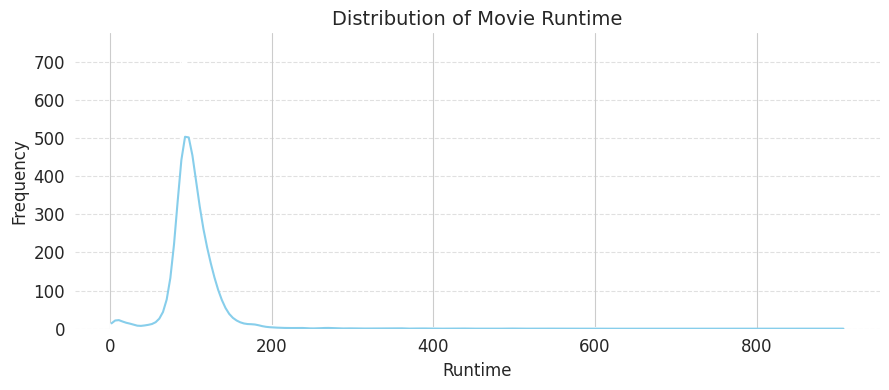

In [ ]:
# Distribution of Runtime
plt.figure(figsize=(9, 4))  # Adjust figure size for better proportions
sns.histplot(Movie['Runtime'], kde=True, color='skyblue',
              linewidth=1.5, alpha=0.7)  # Enhance bars
plt.title('Distribution of Movie Runtime', fontsize=14)  # Bold title
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)  # Increase tick label size
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



The distribution is highly skewed to the right. There's a very prominent peak indicating a high frequency of movies with runtimes around 90-100 minutes. The frequency sharply decreases for runtimes shorter or longer than this peak. While there are some movies with much longer runtimes (extending past 200 minutes), their frequency is very low, suggesting they are rare. This indicates that the vast majority of movies fall within a common range of runtimes, with a clear preference for films around 1.5 to 2 hours long.

<ipython-input-21-d39123937218>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Original_language', data=Movie, order=Movie['Original_language'].value_counts().iloc[:10].index, palette='viridis')


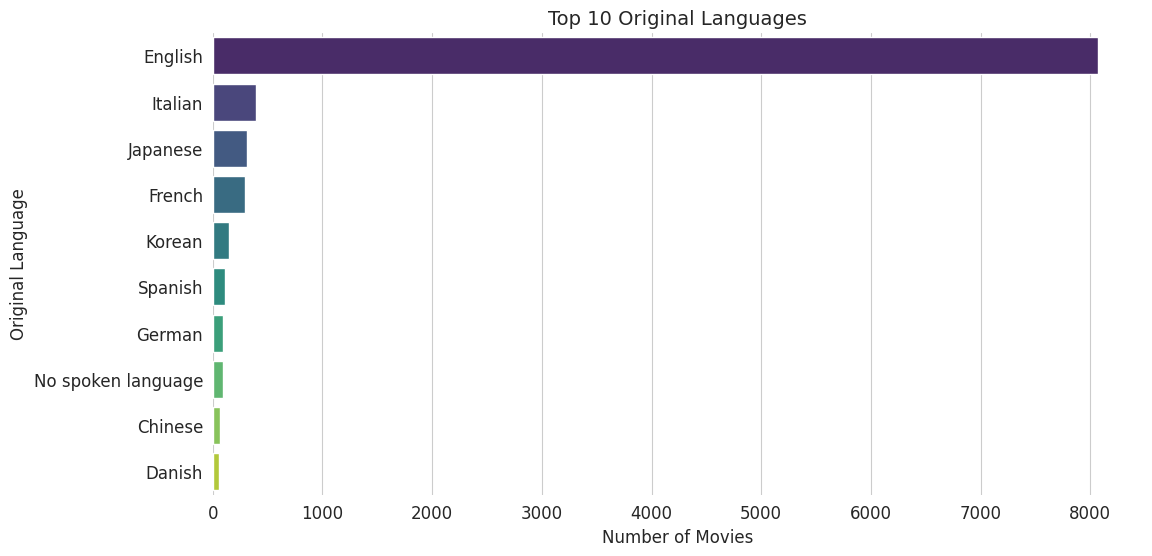

In [ ]:
# Plotting the top 10 Original_languages
plt.figure(figsize=(12, 6))
sns.countplot(y='Original_language', data=Movie, order=Movie['Original_language'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Original Languages', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Original Language', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()


**Dominance of English:** English is overwhelmingly the most frequent original language, with a significantly higher number of movies (approximately 8000) compared to all other languages on the list.

**Next Tier of Languages:** Italian, Japanese, and French form the next tier, each with a much smaller but still substantial number of movies (all below 1000, with Italian being the highest of these three).

**Lesser Frequencies:** Korean, Spanish, German, "No spoken language," Chinese, and Danish follow, each having a relatively low number of movies compared to English, indicating their less frequent use as original languages for the movies in this dataset.

**Clear Disparity:** The chart clearly illustrates a substantial disparity in movie production based on original language, with English-language films dominating the dataset.

<ipython-input-22-e925af729a48>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_non_english_rated = sns.barplot(x='Average_rating', y='Film_title', data=top_10_non_english_rated, palette='coolwarm')


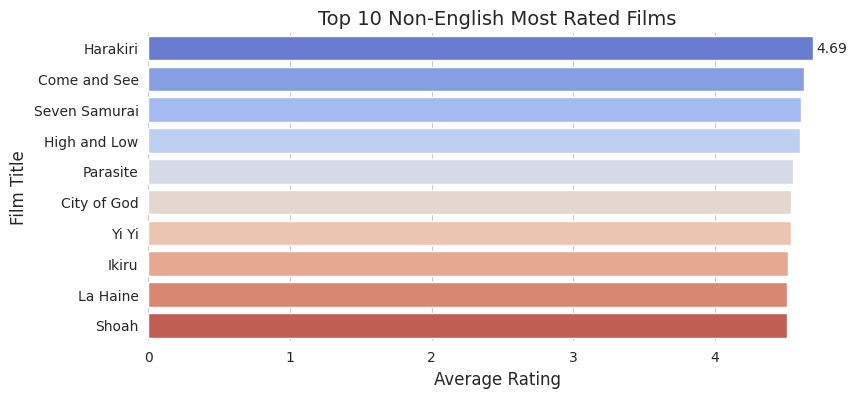

In [ ]:
# Filter for non-English movies
non_english_movies = Movie[Movie['Original_language'] != 'English']

# Sort non-English movies by 'Average_rating' in descending order and get the top 10
top_10_non_english_rated = non_english_movies.sort_values(by='Average_rating', ascending=False).head(10)

# Create the bar chart for top 10 most rated non-English movies
plt.figure(figsize=(9, 4))
ax_non_english_rated = sns.barplot(x='Average_rating', y='Film_title', data=top_10_non_english_rated, palette='coolwarm')

# Add labels and title
plt.title('Top 10 Non-English Most Rated Films', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Film Title', fontsize=12)

# Add bar labels
ax_non_english_rated.bar_label(ax_non_english_rated.containers[0], fmt='%.2f', label_type='edge', padding=3)

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

"**Top 10 Non-English Most Rated Films**," shows "Harakiri" with the highest average rating of 4.69. Films are ranked by average rating, from highest (top) to lowest (bottom), with a color gradient applied to the bars.

<ipython-input-23-9cb0f5aaddb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Spoken_languages', data=Movie, order=Movie['Spoken_languages'].value_counts().iloc[:10].index, palette='viridis')


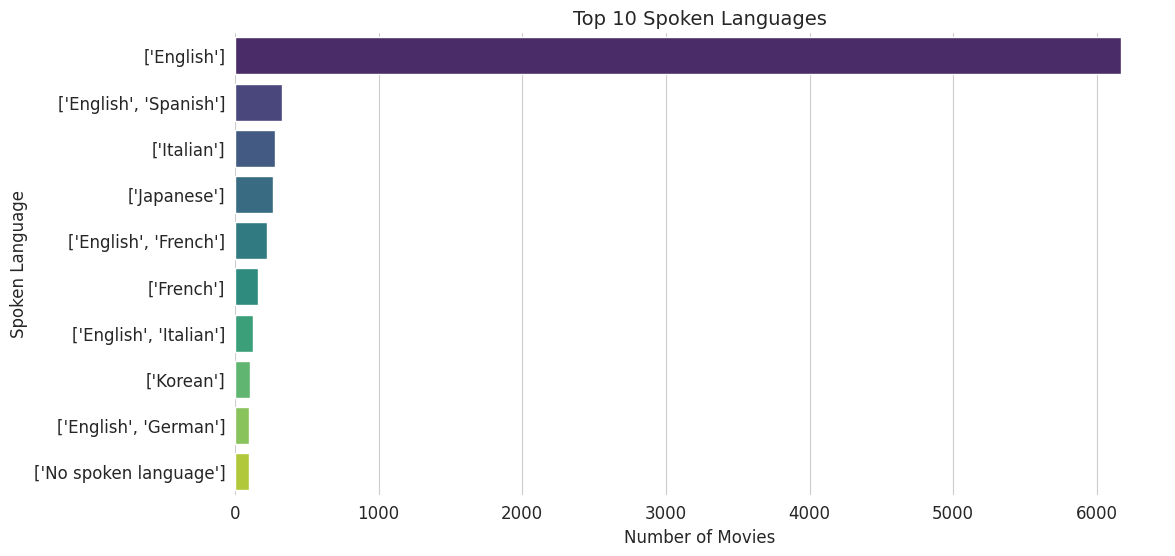

In [ ]:
# Plotting the top 10 Spoken_languages
plt.figure(figsize=(12, 6))
sns.countplot(y='Spoken_languages', data=Movie, order=Movie['Spoken_languages'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Spoken Languages', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Spoken Language', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()


**Dominance of English:** Movies with only English as the spoken language are by far the most frequent, with over 6000 films.

**Multilingual Films:** The chart also highlights the prevalence of films with multiple spoken languages. The combination of 'English', 'Spanish' is the second most common, followed by 'Italian' as a sole language, and 'Japanese' as a sole language.

**English as a Common Component:** It's notable that English appears in several of the top combinations ('English', 'Spanish'; 'English', 'French'; 'English', 'Italian'; 'English', 'German'), indicating its widespread use even in movies with other primary languages.

**Other Languages:** 'French' (solely), 'Korean' (solely), and 'No spoken language' also appear in the top 10, though with significantly lower frequencies compared to English-only films.

<ipython-input-24-c83537224f2d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=studio_counts.values, y=studio_counts.index, palette='magma')


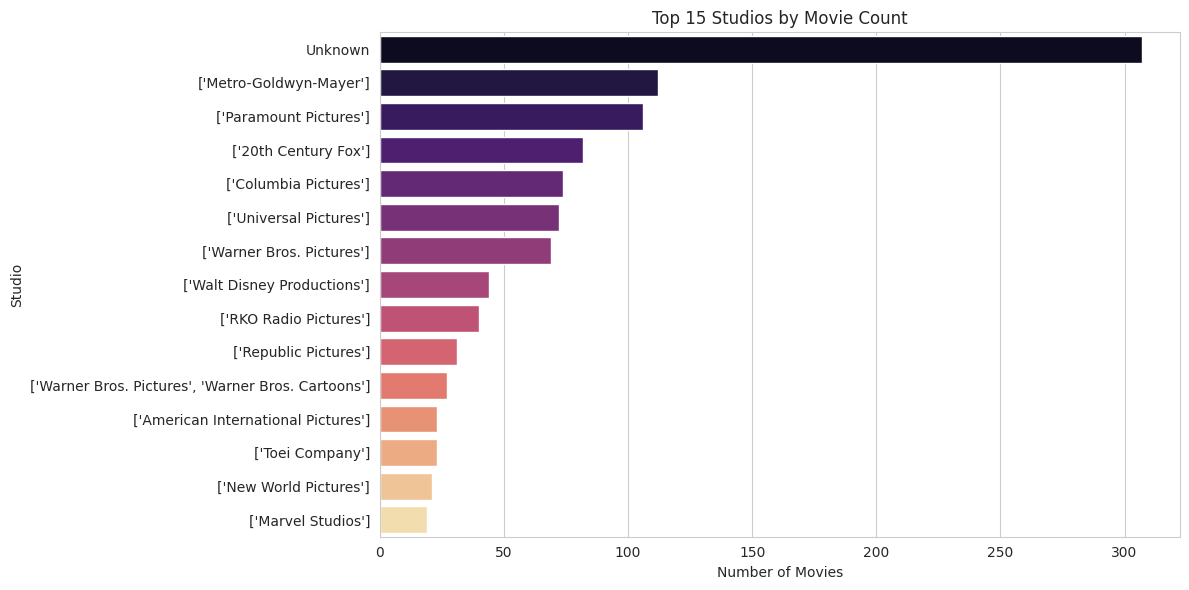

In [ ]:
# Basic cleaning (remove nulls and split by common delimiters if needed)
Movie['Studios'] = Movie['Studios'].fillna('Unknown')

# Top 15 studios by number of movies
studio_counts = Movie['Studios'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_counts.values, y=studio_counts.index, palette='magma')
plt.title('Top 15 Studios by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()


"**Top 15 Studios by Movie Count**" chart shows "Unknown" as the largest category (around 300 movies). Among known studios, Metro-Goldwyn-Mayer and Paramount Pictures lead with over 100 movies each, followed by other major studios like 20th Century Fox and Universal Pictures, indicating their significant historical output.

<ipython-input-7-bcc0a0d8e0ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')


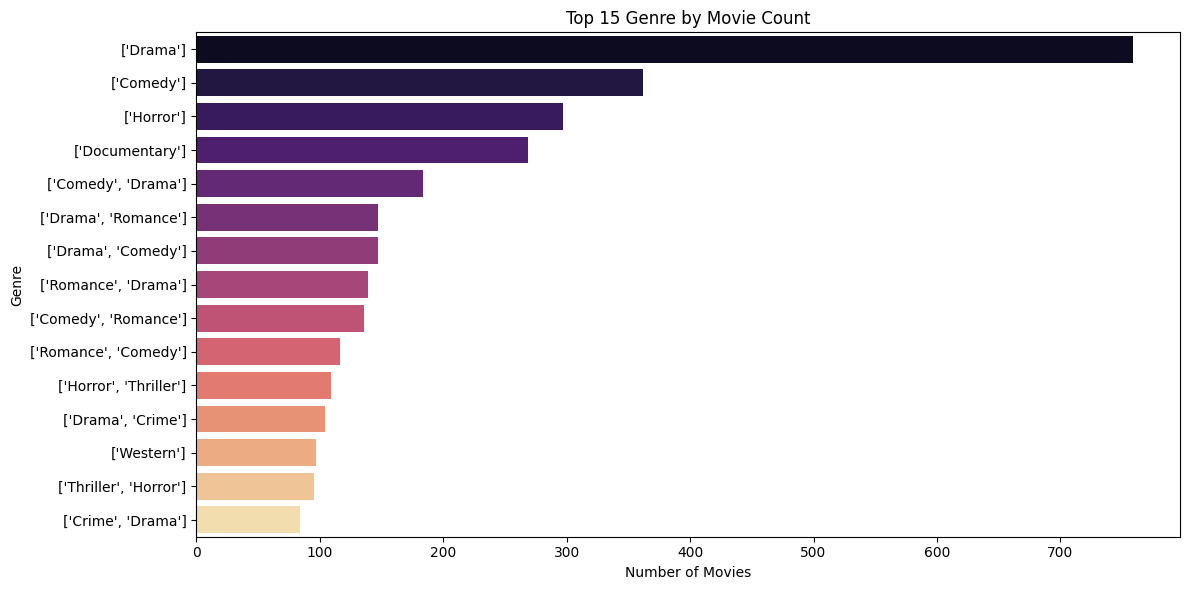

In [ ]:
# Top 15 genre by number of movies
genre_counts = Movie['Genres'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Top 15 Genre by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## **BIVARIATE ANALYSIS**

In [ ]:
# Scatter plot of Average Rating vs. Owner Rating
fig = px.scatter(Movie, x='Average_rating', y='Owner_rating',
                 title='Average Rating vs. Owner Rating',
                 labels={'Average_rating': 'Average Rating', 'Owner_rating': 'Owner Rating'},
                 hover_data=['Film_title']) # Changed 'Movie_Title' to 'Film_title'
fig.show()

# Box plot of Average Rating by Original Language (top 10 languages)
top_languages = Movie['Original_language'].value_counts().nlargest(10).index
fig = px.box(Movie[Movie['Original_language'].isin(top_languages)],
             x='Original_language', y='Average_rating',
             title='Average Rating by Original Language (Top 10)',
             labels={'Original_language': 'Original Language', 'Average_rating': 'Average Rating'})
fig.show()

# Histogram of Runtime with a marginal box plot
fig = px.histogram(Movie, x='Runtime', marginal="box",
                   title='Distribution of Movie Runtime',
                   labels={'Runtime':'Runtime (minutes)'})
fig.show()


# Correlation Heatmap
# Select only numerical features for correlation
numerical_features = Movie.select_dtypes(include=np.number).columns # Changed pd.np.number to np.number
correlation_matrix = Movie[numerical_features].corr() # Calculate correlation for numerical columns only
fig = px.imshow(correlation_matrix, text_auto=True,
                 title='Correlation Matrix of Movie Features',
                 labels=dict(x="Features", y="Features", color="Correlation"))
fig.show()


The scatter plot, "Average Rating vs. Owner Rating," shows a strong concentration of owner ratings at '3', regardless of average rating. For owner ratings of 1, 2, 4, and 5, there's a positive correlation: higher average ratings generally correspond to higher owner ratings, and vice-versa for lower ratings.

The box plot shows "Average Rating by Original Language (Top 10)." Most languages cluster between 2.5 and 4.0 average ratings. Japanese and "No spoken language" have high median ratings. English shows the widest spread and most low-rated outliers, possibly due to its high volume.

The "Distribution of Movie Runtime" graph, combining a histogram and box plot, shows movie runtimes are heavily concentrated around 90-100 minutes. The distribution is highly skewed right, indicating a few much longer films, and a small peak for very short films, but the vast majority are standard feature length.

The heatmap shows a Correlation Matrix of Movie Features. Yellow/orange indicates strong positive correlations, primarily among engagement metrics (Watches, Likes, Fans) and total rating counts. Purple/blue denotes weaker or different correlations, seen with Average_rating, Owner_rating, and Runtime.

<ipython-input-14-68ae59570bbb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_director_watches = sns.barplot(x=top_average_rating_by_watches.values,


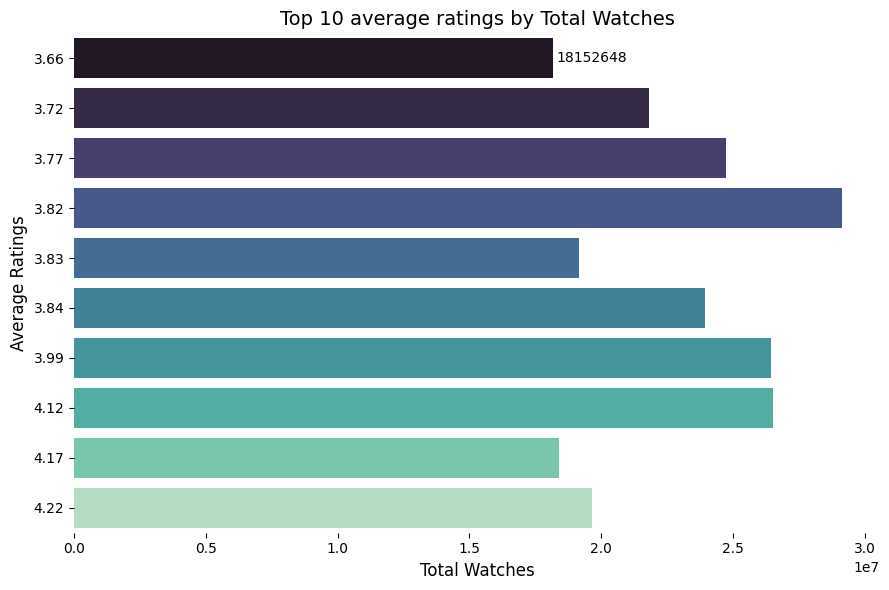

In [ ]:
# Group by Average rating and sum the 'Watches', then sort
top_average_rating_by_watches = Movie.groupby('Average_rating')['Watches'].sum().sort_values(ascending=False).head(10)

# Create the bar chart (horizontal)
plt.figure(figsize=(9, 6)) # Adjusted figure size for a horizontal plot
ax_director_watches = sns.barplot(x=top_average_rating_by_watches.values,
                                   y=top_average_rating_by_watches.index, # Y-axis is now the Director names
                                   palette='mako',
                                   orient='h') # Specify horizontal orientation

# Add labels and title
plt.title('Top 10 average ratings by Total Watches', fontsize=14)
plt.xlabel('Total Watches', fontsize=12) # X-axis is now the counts
plt.ylabel('Average Ratings', fontsize=12) # Y-axis is now the categories

# Add bar labels
# For horizontal bars, labels are placed on the right end
ax_director_watches.bar_label(ax_director_watches.containers[0], fmt='%d', label_type='edge', padding=3)


# Remove spines
sns.despine(left=True, bottom=True) # Keep bottom spine for x-axis labels

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


This horizontal bar graph displays the top 10 average ratings, ordered from highest (4.22) to lowest (3.66) on the y-axis, and their corresponding "Total Watches" on the x-axis. The length of each bar represents the total number of watches for that average rating, with specific values shown for some bars (e.g., 18,152,648 for the 3.66 rating). In essence, it visualizes how many total watches each of the top average ratings received.

## **MULTIVARIATE ANALYSIS**

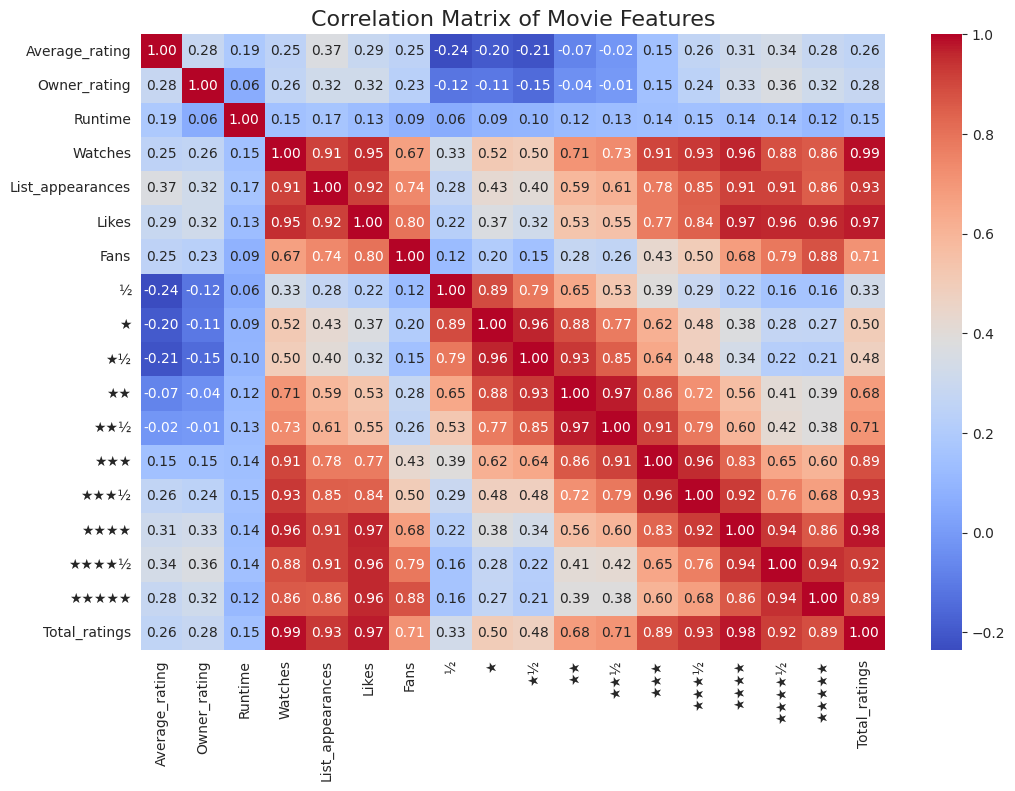

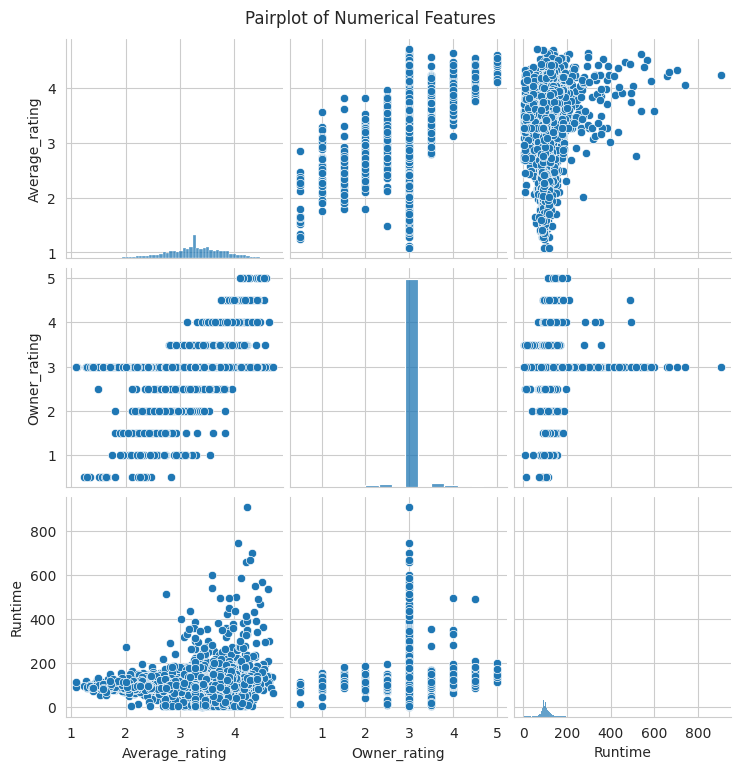

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Features', fontsize=16)
plt.show()

# Pairplot for selected numerical features
numerical_cols = ['Average_rating', 'Owner_rating', 'Runtime']  # Example features
sns.pairplot(Movie[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Adjust the title position
plt.show()

The correlation matrix (heatmap) displays the Pearson correlation coefficients between various movie features.

Strong positive correlations (red, near 1.00) exist among engagement metrics (Watches, Likes, Fans, List_appearances) and total rating counts. Average_rating, Owner_rating, and Runtime generally show weaker positive linear correlations with these other features. The diagonal is 1.00 (variable with itself).


The pairplot visualizes relationships between Average_rating, Owner_rating, and Runtime.

Diagonal plots show individual feature distributions (e.g., Owner_rating is heavily concentrated at 1, Runtime is right-skewed).
Off-diagonal scatter plots reveal pairwise correlations. There's a general positive trend between Average_rating and both Owner_rating and Runtime. The relationship between Owner_rating and Runtime is less clear due to the dominant '1' value in Owner_rating.

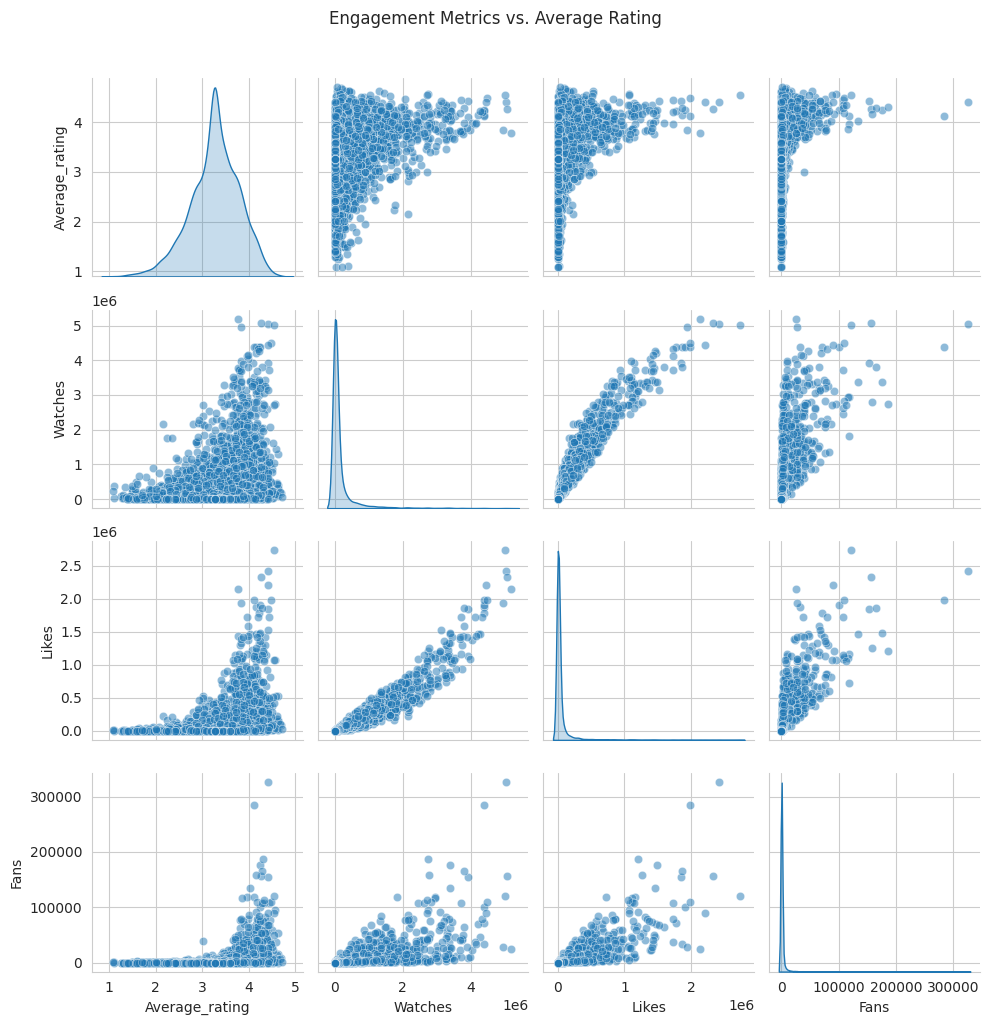

In [ ]:
# Filter and drop missing values
engagement_Movie = Movie[['Average_rating', 'Watches', 'Likes', 'Fans']].dropna()

# Pairplot
sns.pairplot(engagement_Movie, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Engagement Metrics vs. Average Rating', y=1.02)
plt.tight_layout()
plt.show()


The scatterplot matrix visualizing the relationships between "Engagement Metrics" (Watches, Likes, Fans) and "Average Rating."

The diagonal plots show the distribution of each individual variable (e.g., Average_Rating is skewed towards higher values).
The off-diagonal plots display pairwise scatter relationships. They indicate positive correlations: as Average_Rating increases, engagement metrics tend to rise. Similarly, the engagement metrics (Watches, Likes, Fans) are strongly positively correlated with each other.
The transparency of points helps visualize data density.

In [ ]:
Movie.columns

Index(['Film_title', 'Director', 'Cast', 'Average_rating', 'Owner_rating',
       'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL',
       'Genres_encoding', 'Cast_encoding', 'Spoken_languages_encoding',
       'Rating_Class'],
      dtype='object')

# **DATA CLEANING AND PREPARATION**

In [8]:
# Outlier detection and treatment:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to specific columns
Movie = remove_outliers_iqr(Movie, 'Runtime')
Movie = remove_outliers_iqr(Movie, 'Average_rating')
Movie = remove_outliers_iqr(Movie, 'Owner_rating')

# Example: standardizing director names
Movie['Director'] = Movie['Director'].str.strip().str.title()  # Remove extra spaces and title case

# Duplicate removal
Movie = Movie.drop_duplicates()


Movie.info()
Movie.describe()
Movie.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 8236 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         8236 non-null   object 
 1   Director           8233 non-null   object 
 2   Cast               8214 non-null   object 
 3   Average_rating     8236 non-null   float64
 4   Owner_rating       8236 non-null   float64
 5   Genres             8230 non-null   object 
 6   Runtime            8236 non-null   float64
 7   Countries          8147 non-null   object 
 8   Original_language  8235 non-null   object 
 9   Spoken_languages   8235 non-null   object 
 10  Description        8234 non-null   object 
 11  Studios            8002 non-null   object 
 12  Watches            8236 non-null   int64  
 13  List_appearances   8236 non-null   int64  
 14  Likes              8236 non-null   int64  
 15  Fans               8236 non-null   int64  
 16  ½                  8236 non-

,0
Film_title,0
Director,3
Cast,22
Average_rating,0
Owner_rating,0
Genres,6
Runtime,0
Countries,89
Original_language,1
Spoken_languages,1


In [13]:
Movie.columns

Index(['Film_title', 'Director', 'Cast', 'Average_rating', 'Owner_rating',
       'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL',
       'Genres_encoding', 'Cast_encoding', 'Spoken_languages_encoding',
       'Director_encoding'],
      dtype='object')

In [ ]:
Movie['Countries'] = Movie['Countries'].fillna('[]')
Movie['Countries']=Movie['Countries'].apply(lambda x: ast.literal_eval(x))
Movie['Countries'] = Movie['Countries'].apply(lambda x: sorted(x))
Movie['Countries_str'] = Movie['Countries'].apply(lambda x: ', '.join(x))
Movie['Countries_str_count']=Movie['Countries_str'].apply(lambda x: len(x.split(',')))

In [49]:
Movie['Cast_encoding']=Movie['Cast'].map(Movie.groupby(by=['Cast'],as_index=True)['Average_rating'].count().to_dict())

In [61]:
Movie['Cast'] = Movie['Cast'].fillna('[]')
Movie['Cast_Count']=Movie['Cast'].apply(lambda x: len(ast.literal_eval(x)))

### Target Encoding

In [62]:
Movie['Genres_encoding']=Movie['Genres'].map(Movie.groupby(by=['Genres'],as_index=True)['Average_rating'].mean().to_dict())
Movie['Spoken_languages_encoding']=Movie['Spoken_languages'].map(Movie.groupby(by=['Spoken_languages'],as_index=True)['Average_rating'].mean().to_dict())
Movie['Director_encoding']=Movie['Director'].map(Movie.groupby(by=['Director'],as_index=True)['Average_rating'].mean().to_dict())
Movie['Countries_str_encoding']=Movie['Countries_str'].map(Movie.groupby(by=['Countries_str'],as_index=True)['Average_rating'].mean().to_dict())
Movie['Original_language_encoding']=Movie['Original_language'].map(Movie.groupby(by=['Original_language'],as_index=True)['Average_rating'].mean().to_dict())
Movie['Cast_Count_encoding']=Movie['Cast_Count'].map(Movie.groupby(by=['Cast_Count'],as_index=True)['Average_rating'].mean().to_dict())

#**PREDICTIVE MODELING**

In [40]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.3 MB/s eta 0:00:00


In [41]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [43]:
Movie.columns

Index(['Film_title', 'Director', 'Cast', 'Average_rating', 'Owner_rating',
       'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL',
       'Genres_encoding', 'Cast_encoding', 'Spoken_languages_encoding',
       'Director_encoding', 'Countries_str', 'Countries_str_encoding',
       'Original_language_encoding'],
      dtype='object')

In [63]:
# Select features and target
features = ['Genres_encoding','Cast_Count_encoding','Spoken_languages_encoding','Director_encoding',
            'Countries_str_encoding','Original_language_encoding','Watches','Likes','Runtime','Fans',
            'List_appearances','Countries_str_count'
            ]
target = 'Average_rating'

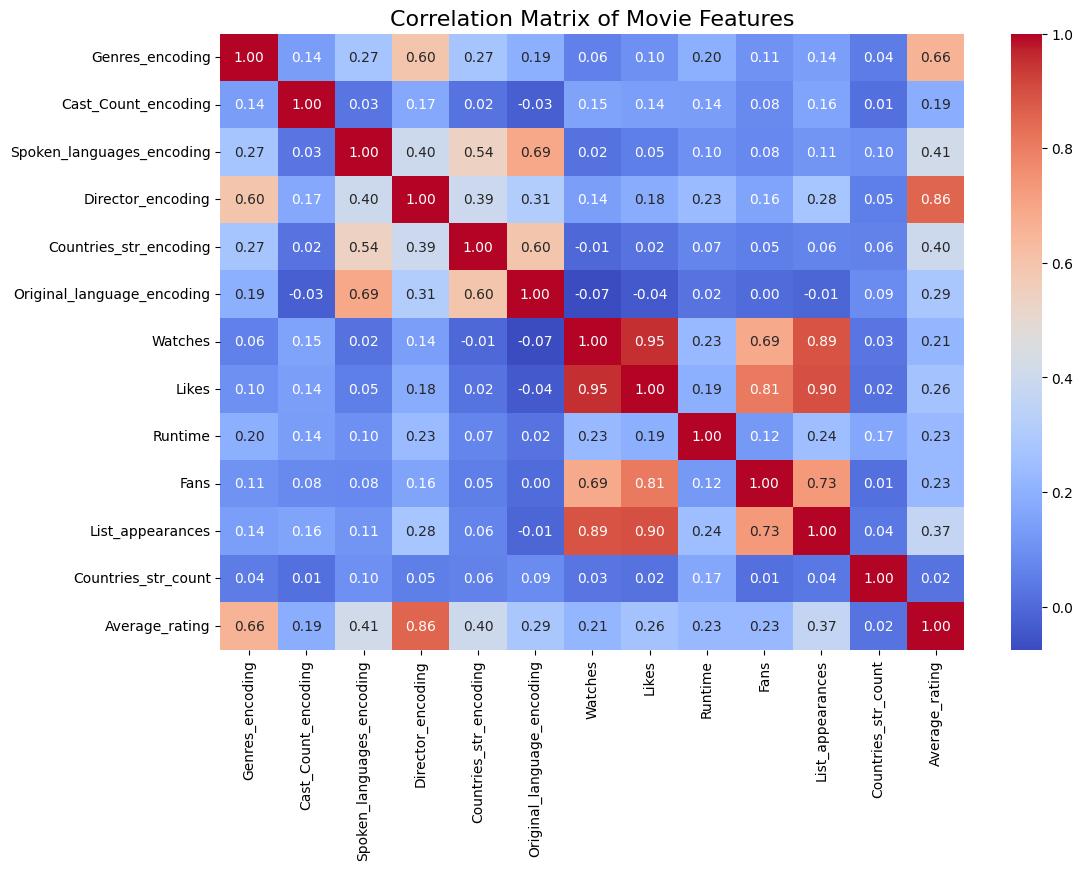

In [64]:
 # Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(Movie[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Features', fontsize=16)
plt.show()

In [65]:
# Drop rows with missing values in selected features or target
Movie_modeling = Movie[features + [target]].dropna()

In [66]:
Movie_modeling

,Genres_encoding,Cast_Count_encoding,Spoken_languages_encoding,Director_encoding,Countries_str_encoding,Original_language_encoding,Watches,Likes,Runtime,Fans,List_appearances,Countries_str_count,Average_rating
0,3.430502,3.210030,3.375144,3.419268,3.430279,3.421773,12841,3763,92.0,79,11032,1,3.570000
5,3.539492,3.207775,3.990000,3.685000,3.741429,3.591169,34777,8585,102.0,192,14370,2,3.770000
8,3.410000,3.245808,3.706178,3.833333,3.340711,3.192824,228162,70932,105.0,3400,101285,1,4.250000
9,3.414682,3.256571,3.650000,3.314000,3.195872,3.192824,382201,93489,120.0,504,58859,1,3.760000
10,3.615665,3.181356,3.960000,3.960000,3.274109,3.192824,85388,25616,90.0,188,16745,2,3.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,2.942926,3.168290,3.166214,2.985964,3.195872,3.192824,13200,963,94.0,0,3768,1,2.210000
9993,3.539492,3.224458,3.166214,2.985964,3.290589,3.192824,6597,1062,103.0,8,3709,2,3.420000
9995,3.190000,3.290932,3.166214,2.985964,3.125000,3.192824,2784,404,135.0,9,931,2,3.190000
9999,3.178678,3.139050,3.375144,2.985964,3.430279,3.421773,82,4,89.0,0,43,1,3.268535


In [67]:
# Handle categorical features using one-hot encoding
X = Movie_modeling[features]
y = Movie_modeling[target]

In [68]:
X_encoded =X
X_encoded

,Genres_encoding,Cast_Count_encoding,Spoken_languages_encoding,Director_encoding,Countries_str_encoding,Original_language_encoding,Watches,Likes,Runtime,Fans,List_appearances,Countries_str_count
0,3.430502,3.210030,3.375144,3.419268,3.430279,3.421773,12841,3763,92.0,79,11032,1
5,3.539492,3.207775,3.990000,3.685000,3.741429,3.591169,34777,8585,102.0,192,14370,2
8,3.410000,3.245808,3.706178,3.833333,3.340711,3.192824,228162,70932,105.0,3400,101285,1
9,3.414682,3.256571,3.650000,3.314000,3.195872,3.192824,382201,93489,120.0,504,58859,1
10,3.615665,3.181356,3.960000,3.960000,3.274109,3.192824,85388,25616,90.0,188,16745,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,2.942926,3.168290,3.166214,2.985964,3.195872,3.192824,13200,963,94.0,0,3768,1
9993,3.539492,3.224458,3.166214,2.985964,3.290589,3.192824,6597,1062,103.0,8,3709,2
9995,3.190000,3.290932,3.166214,2.985964,3.125000,3.192824,2784,404,135.0,9,931,2
9999,3.178678,3.139050,3.375144,2.985964,3.430279,3.421773,82,4,89.0,0,43,1


In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_encoded)
X_minmax=pd.DataFrame(X_minmax,columns=X_encoded.columns)

print("X after Min-Max Scaling:")
print(X_minmax.head())

# Standard Scaling (Z-score normalization)
scaler_standard = StandardScaler()
X_standard = X.copy() # Create another copy
X_standard = scaler_standard.fit_transform(X_encoded)
X_standard=pd.DataFrame(X_standard,columns=X_encoded.columns)


print("\nX after Standard Scaling:")
print(X_standard.head())

X after Min-Max Scaling:
   Genres_encoding  Cast_Count_encoding  Spoken_languages_encoding  \
0         0.587501             0.403601                   0.568242   
1         0.630751             0.402590                   0.822314   
2         0.579365             0.419645                   0.705032   
3         0.581223             0.424471                   0.681818   
4         0.660978             0.390743                   0.809917   

   Director_encoding  Countries_str_encoding  Original_language_encoding  \
0           0.571699                0.568202                    0.321092   
1           0.675097                0.689272                    0.468869   
2           0.732815                0.533350                    0.121363   
3           0.530739                0.476993                    0.121363   
4           0.782101                0.507435                    0.121363   

    Watches     Likes   Runtime      Fans  List_appearances  \
0  0.002471  0.001758  0.406250  0

# **SHOULD WE TREAT AVERAGE RATING AS A CLASSIFICATION PROBLEM OR REGRESSION PROBLEM?**



**1. Classification Problem (Multi-class Classification)**

Treating the problem as multi-class classification means predicting the exact rating category (1, 2, 3, 4, or 5).

*   **Pros:**
    *   **Directly predicts categories:** If your primary goal is to know the specific rating a movie is likely to fall into (e.g., "This movie is likely a 4"), classification is a natural fit.
    *   **Interpretability of classes:** You can evaluate how well your model distinguishes between different rating levels. Metrics like accuracy, precision, recall, and F1-score provide insights into performance for each rating class.
    *   **Handles non-linear relationships:** Classification models (like tree-based models or neural networks) can capture non-linear relationships between features and the rating categories.
    *   **Clear decision boundaries:** Classification models learn distinct boundaries between classes.

*   **Cons:**
    *   **Ignores the ordinal nature:** Classification treats the ratings (1, 2, 3, 4, 5) as distinct, unrelated categories rather than ordered levels. This means it doesn't inherently understand that a prediction of 2 is "closer" to a true rating of 3 than a prediction of 5. An incorrect prediction of 1 when the true rating is 5 is penalized the same way as an incorrect prediction of 4 when the true rating is 5 in standard classification metrics.
    *   **Loss of granularity:** You lose the ability to predict nuanced ratings like 3.7 or 4.1. The prediction is restricted to the integer values 1 through 5.
    *   **Might require different model types:** While you could use `LogisticRegression` for multi-class, tree-based models (`RandomForestClassifier`, `XGBClassifier`) or neural networks are often more suitable for complex multi-class problems.

**2. Regression Problem**

Treating the problem as regression means predicting a continuous numerical value for the rating. While the actual ratings are integers 1-5, regression can predict any value within or outside this range (though you might round the final prediction to the nearest integer or within the 1-5 bounds).

*   **Pros:**
    *   **Captures the ordinal nature:** Regression naturally understands the ordering and distance between rating values. Predicting 3.2 when the true value is 3.5 is considered a small error, whereas predicting 5 is a large error.
    *   **Provides more granular predictions:** The model can predict values between the integers, potentially offering a more nuanced understanding of a movie's expected rating.
    *   **Common for rating prediction:** Predicting ratings is a standard use case for regression.
    *   **Evaluated with relevant metrics:** Metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared directly measure how close your predictions are to the true values.

*   **Cons:**
    *   **Predictions might be outside the 1-5 range:** A standard regression model can predict values less than 1 or greater than 5. You would need to handle this in post-processing (e.g., clamping the predictions to [1, 5]).
    *   **Interpretation of non-integer predictions:** While regression gives granular values (like 3.7), interpreting what a 3.7 rating *means* compared to a 3 or 4 might be less intuitive than discrete classes.
    *   **Doesn't directly provide class probabilities:** If you need to know the probability of a movie getting *exactly* a 4-star rating, a standard regression model doesn't provide this directly (though you could potentially adapt it or build a separate classification layer).

**Which approach to choose?**

Given that your ratings are integers 1-5 and represent ordered levels, and you likely care more about *how close* your prediction is to the true rating than just getting the exact category right, **treating it as a Regression problem is often the more appropriate approach.**

Why regression is often preferred here:

*   The difference between a 3 and a 4 is meaningful and ordinal (a 4 is strictly "better" than a 3). Regression respects this ordering.
*   Metrics like MSE and RMSE directly quantify the magnitude of prediction errors. Missing by 1 star (e.g., predicting 3 when it's 4) is less penalized than missing by 4 stars (e.g., predicting 1 when it's 5). This aligns better with the nature of ratings.
*   While the target is technically discrete, the underlying concept is a continuous quality measure mapped onto a discrete scale. Predicting the underlying continuous quality (even if we later round it) can be more informative.

You could potentially also explore **Ordinal Regression**, which is a hybrid approach specifically designed for target variables that are ordered categories (like ratings). This approach acknowledges both the categorical nature and the order. However, it might require different library implementations and can be less straightforward than standard classification or regression depending on the tools available.

**Recommendation:**

Start by treating it as a **Regression problem**. Use regression models (`LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`, `XGBRegressor`). Evaluate using metrics like MSE, RMSE, and R-squared. You can round your final predictions to the nearest integer between 1 and 5 if you need to output a specific rating category.

If you later find that you specifically need to understand the boundaries between classes or need class probabilities, you could then explore the classification approach or ordinal regression.



In [70]:
X_minmax['Likes']

,Likes
0,0.001758
1,0.004011
2,0.033140
3,0.043679
4,0.011968
...,...
8221,0.000450
8222,0.000496
8223,0.000189
8224,0.000002


In [74]:
### On plain  data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nLinear Regression:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


# Optional: Train other models and compare
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'\nDecision Tree Regressor:')
print(f'Mean Squared Error: {mse_dt}')
print(f'Root Mean Squared Error: {rmse_dt}')
print(f'R-squared: {r2_dt}')


# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'\nRandom Forest Regressor:')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')


# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values # Convert target as well, although it's already a Series

xgb_model.fit(X_train_np, y_train_np)

y_pred_xgb = xgb_model.predict(X_test_np)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'\nXGBoost Regressor:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')


Linear Regression:
Mean Squared Error: 0.04629451422120713
Root Mean Squared Error: 0.21516160024783032
R-squared: 0.794490562039046

Decision Tree Regressor:
Mean Squared Error: 0.06905304146460965
Root Mean Squared Error: 0.26277945403819086
R-squared: 0.6934614828643006

Random Forest Regressor:
Mean Squared Error: 0.033993898335599904
Root Mean Squared Error: 0.18437434294282895
R-squared: 0.8490951453196006

XGBoost Regressor:
Mean Squared Error: 0.02974186280117597
Root Mean Squared Error: 0.17245829293245357
R-squared: 0.8679706740419469


In [71]:
### On MinMax Scaled Data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nLinear Regression:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'\nDecision Tree Regressor:')
print(f'Mean Squared Error: {mse_dt}')
print(f'Root Mean Squared Error: {rmse_dt}')
print(f'R-squared: {r2_dt}')


# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'\nRandom Forest Regressor:')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')


# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values # Convert target as well, although it's already a Series

xgb_model.fit(X_train_np, y_train_np)

y_pred_xgb = xgb_model.predict(X_test_np)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'\nXGBoost Regressor:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')


Linear Regression:
Mean Squared Error: 0.04629451422135535
Root Mean Squared Error: 0.21516160024817474
R-squared: 0.794490562038388

Decision Tree Regressor:
Mean Squared Error: 0.0689962978437105
Root Mean Squared Error: 0.2626714637026841
R-squared: 0.6937133777126434

Random Forest Regressor:
Mean Squared Error: 0.034045328897679326
Root Mean Squared Error: 0.18451376343698409
R-squared: 0.8488668360677429

XGBoost Regressor:
Mean Squared Error: 0.02974186280117597
Root Mean Squared Error: 0.17245829293245357
R-squared: 0.8679706740419469


In [75]:
### On Standardized Scaled Data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nLinear Regression:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


# Optional: Train other models and compare
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'\nDecision Tree Regressor:')
print(f'Mean Squared Error: {mse_dt}')
print(f'Root Mean Squared Error: {rmse_dt}')
print(f'R-squared: {r2_dt}')


# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'\nRandom Forest Regressor:')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')


# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values # Convert target as well, although it's already a Series

xgb_model.fit(X_train_np, y_train_np)

y_pred_xgb = xgb_model.predict(X_test_np)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'\nXGBoost Regressor:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')


Linear Regression:
Mean Squared Error: 0.04629451422135535
Root Mean Squared Error: 0.21516160024817474
R-squared: 0.794490562038388

Decision Tree Regressor:
Mean Squared Error: 0.06885899529207017
Root Mean Squared Error: 0.26240997559557483
R-squared: 0.6943228877311174

Random Forest Regressor:
Mean Squared Error: 0.034011881443963166
Root Mean Squared Error: 0.18442310442014354
R-squared: 0.8490153151592739

XGBoost Regressor:
Mean Squared Error: 0.02974186280117597
Root Mean Squared Error: 0.17245829293245357
R-squared: 0.8679706740419469


In [76]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.6 MB/s eta 0:00:00


#### VIF: Multicorrelation Handling

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Genres_encoding,28.412179
1,Cast_Count_encoding,59.277476
2,Spoken_languages_encoding,73.765079
3,Director_encoding,21.228203
4,Countries_str_encoding,66.689042
5,Original_language_encoding,6.095403
6,Watches,17.399633
7,Likes,22.998110
8,Runtime,10.918082
9,Fans,3.816130


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax.drop(columns='Spoken_languages_encoding') # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Genres_encoding,28.148117
1,Cast_Count_encoding,47.633992
2,Director_encoding,21.144794
3,Countries_str_encoding,56.982466
4,Original_language_encoding,4.783652
5,Watches,17.397219
6,Likes,22.986328
7,Runtime,10.869996
8,Fans,3.815276
9,List_appearances,7.669458


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding']) # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Genres_encoding,27.566081
1,Cast_Count_encoding,22.971780
2,Director_encoding,20.684223
3,Original_language_encoding,3.507278
4,Watches,17.395821
5,Likes,22.972794
6,Runtime,10.828799
7,Fans,3.809224
8,List_appearances,7.665119
9,Countries_str_count,1.281601


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding','Genres_encoding']) # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Cast_Count_encoding,17.013011
1,Director_encoding,14.773540
2,Original_language_encoding,3.503710
3,Watches,17.342813
4,Likes,22.914212
5,Runtime,10.681513
6,Fans,3.806899
7,List_appearances,7.640592
8,Countries_str_count,1.281599


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding','Genres_encoding','Likes']) # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Cast_Count_encoding,16.947829
1,Director_encoding,14.656300
2,Original_language_encoding,3.499773
3,Watches,5.794821
4,Runtime,10.506592
5,Fans,2.247730
6,List_appearances,7.424714
7,Countries_str_count,1.280929


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding','Genres_encoding','Likes','Cast_Count_encoding']) # Using the scaled features (or X_standard, choose one)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
vif_data



Variance Inflation Factor (VIF):


,feature,VIF
0,Director_encoding,9.551434
1,Original_language_encoding,3.462720
2,Watches,5.702615
3,Runtime,7.406255
4,Fans,2.247314
5,List_appearances,7.232568
6,Countries_str_count,1.280329


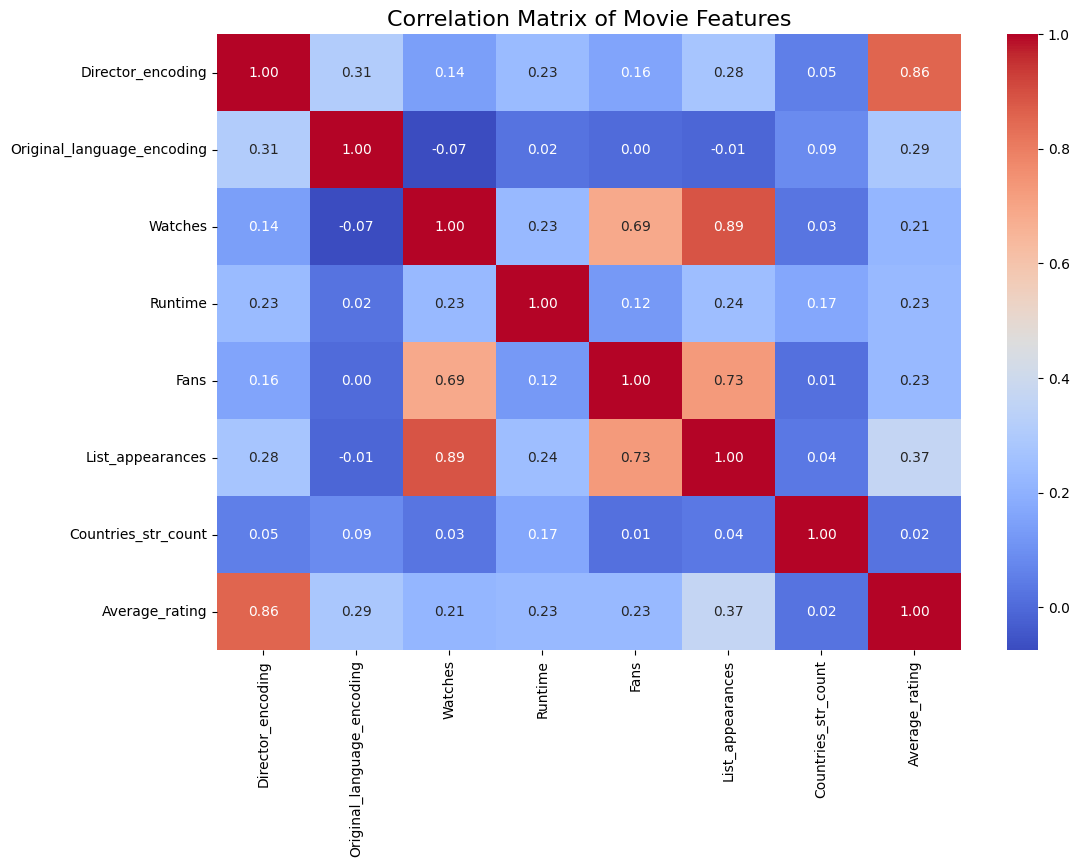

In [115]:
 # Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(Movie[X.columns.to_list() + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Features', fontsize=16)
plt.show()

In [84]:
### On Standardized Scaled Data

X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding','Genres_encoding','Likes','Cast_Count_encoding']) # Using the scaled features (or X_standard, choose one)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nLinear Regression:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


# Optional: Train other models and compare
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'\nDecision Tree Regressor:')
print(f'Mean Squared Error: {mse_dt}')
print(f'Root Mean Squared Error: {rmse_dt}')
print(f'R-squared: {r2_dt}')


# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'\nRandom Forest Regressor:')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')


# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values # Convert target as well, although it's already a Series

xgb_model.fit(X_train_np, y_train_np)

y_pred_xgb = xgb_model.predict(X_test_np)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'\nXGBoost Regressor:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')


Linear Regression:
Mean Squared Error: 0.055872546373411665
Root Mean Squared Error: 0.23637374298642322
R-squared: 0.7519720036853264

Decision Tree Regressor:
Mean Squared Error: 0.08643564136098418
Root Mean Squared Error: 0.29399939006906833
R-squared: 0.6162970845527695

Random Forest Regressor:
Mean Squared Error: 0.044876353467594894
Root Mean Squared Error: 0.21184039621279718
R-squared: 0.8007860254285208

XGBoost Regressor:
Mean Squared Error: 0.043558260404032996
Root Mean Squared Error: 0.20870615804051637
R-squared: 0.8066372708564025


#### HyperParameter Tuning

##### Removed Multicorrelated Columns

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3), # Step size shrinkage
    'max_depth': randint(3, 10),       # Maximum depth of trees
    'min_child_weight': randint(1, 6), # Minimum sum of instance weight (hessian) needed in a child
    'gamma': uniform(0, 0.4),          # Minimum loss reduction required to make a further partition
    'subsample': uniform(0.6, 0.4),    # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.5),      # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5)      # L2 regularization term on weights
}

X = X_minmax.drop(columns=['Spoken_languages_encoding','Countries_str_encoding','Genres_encoding','Likes','Cast_Count_encoding']) # Using the scaled features (or X_standard, choose one)


# Initialize the XGBoost Regressor
xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=xgb_tuned,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # You can adjust this based on computational budget
                                   scoring='r2', # or 'neg_mean_squared_error'
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)



# If you are using X_standard as is (without dropping features for VIF):
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the random search to the training data
random_search.fit(X_train_tuned, y_train_tuned)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest parameters found by RandomizedSearchCV:")
print(best_params)
print("\nBest R-squared score (from cross-validation) on training data:")
print(best_score)

# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test_tuned)

mse_tuned = mean_squared_error(y_test_tuned, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test_tuned, y_pred_tuned)

print(f'\nTuned XGBoost Regressor performance on the test set:')
print(f'Mean Squared Error: {mse_tuned}')
print(f'Root Mean Squared Error: {rmse_tuned}')
print(f'R-squared: {r2_tuned}')

# Compare the R-squared of the tuned model with the original XGBoost R-squared
original_xgb_r2 = r2_xgb # Get the R-squared from the previous non-tuned XGBoost run
print(f'\nOriginal XGBoost R-squared: {original_xgb_r2}')
print(f'Tuned XGBoost R-squared: {r2_tuned}')

if r2_tuned > original_xgb_r2:
    print("\nHyperparameter tuning improved the R-squared score on the test set.")
elif r2_tuned < original_xgb_r2:
    print("\nHyperparameter tuning did not improve the R-squared score on the test set.")
else:
    print("\nHyperparameter tuning resulted in the same R-squared score on the test set.")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found by RandomizedSearchCV:
{'colsample_bytree': np.float64(0.9895022075365837), 'gamma': np.float64(0.0931085361721217), 'learning_rate': np.float64(0.03718193035984624), 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 413, 'reg_alpha': np.float64(0.2571172192068058), 'reg_lambda': np.float64(0.29620728443102123), 'subsample': np.float64(0.6185801650879991)}

Best R-squared score (from cross-validation) on training data:
0.8170161259539197

Tuned XGBoost Regressor performance on the test set:
Mean Squared Error: 0.041828406673320856
Root Mean Squared Error: 0.20451994199422427
R-squared: 0.8143163938353073

Original XGBoost R-squared: 0.8066372708564025
Tuned XGBoost R-squared: 0.8143163938353073

Hyperparameter tuning improved the R-squared score on the test set.


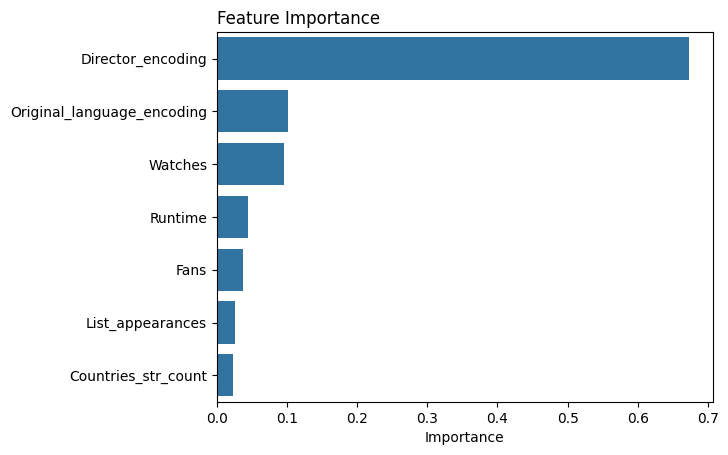

In [130]:
sns.barplot(x='Importance',y=X.columns,data=pd.DataFrame(best_xgb_model.feature_importances_,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False).reset_index())
plt.title("Feature Importance",loc='left')
plt.xlabel("Importance")
plt.ylabel("")
plt.show()

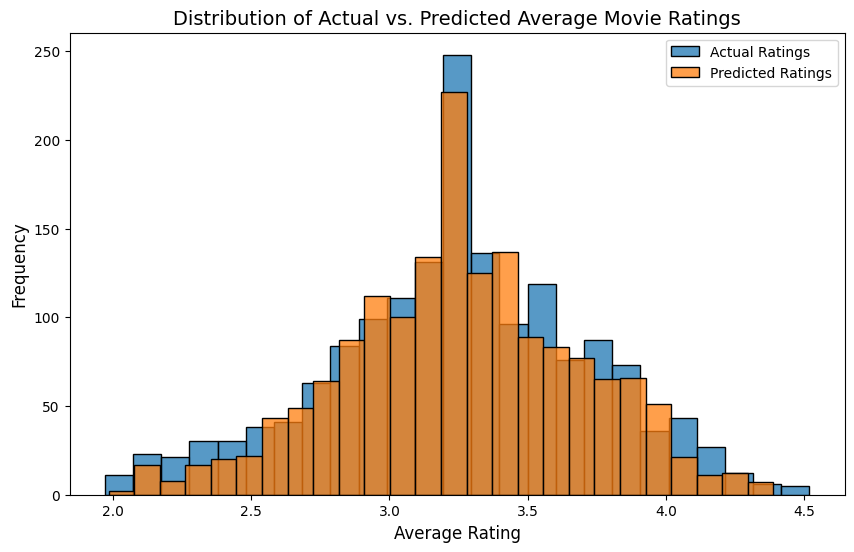

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Ratings')
sns.histplot(y_pred_tuned, label='Predicted Ratings')
plt.title('Distribution of Actual vs. Predicted Average Movie Ratings', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

##### Keeping Multicorrelated Columns

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3), # Step size shrinkage
    'max_depth': randint(3, 10),       # Maximum depth of trees
    'min_child_weight': randint(1, 6), # Minimum sum of instance weight (hessian) needed in a child
    'gamma': uniform(0, 0.4),          # Minimum loss reduction required to make a further partition
    'subsample': uniform(0.6, 0.4),    # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.5),      # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5)      # L2 regularization term on weights
}

X = X_minmax

# Initialize the XGBoost Regressor
xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=xgb_tuned,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # You can adjust this based on computational budget
                                   scoring='r2', # or 'neg_mean_squared_error'
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)



# If you are using X_standard as is (without dropping features for VIF):
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the random search to the training data
random_search.fit(X_train_tuned, y_train_tuned)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest parameters found by RandomizedSearchCV:")
print(best_params)
print("\nBest R-squared score (from cross-validation) on training data:")
print(best_score)

# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test_tuned)

mse_tuned = mean_squared_error(y_test_tuned, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test_tuned, y_pred_tuned)

print(f'\nTuned XGBoost Regressor performance on the test set:')
print(f'Mean Squared Error: {mse_tuned}')
print(f'Root Mean Squared Error: {rmse_tuned}')
print(f'R-squared: {r2_tuned}')

# Compare the R-squared of the tuned model with the original XGBoost R-squared
original_xgb_r2 = r2_xgb # Get the R-squared from the previous non-tuned XGBoost run
print(f'\nOriginal XGBoost R-squared: {original_xgb_r2}')
print(f'Tuned XGBoost R-squared: {r2_tuned}')

if r2_tuned > original_xgb_r2:
    print("\nHyperparameter tuning improved the R-squared score on the test set.")
elif r2_tuned < original_xgb_r2:
    print("\nHyperparameter tuning did not improve the R-squared score on the test set.")
else:
    print("\nHyperparameter tuning resulted in the same R-squared score on the test set.")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found by RandomizedSearchCV:
{'colsample_bytree': np.float64(0.9379501243877818), 'gamma': np.float64(0.009308774294330347), 'learning_rate': np.float64(0.2543405447766807), 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 363, 'reg_alpha': np.float64(0.3483685826820753), 'reg_lambda': np.float64(0.314471423389942), 'subsample': np.float64(0.9509888054108212)}

Best R-squared score (from cross-validation) on training data:
0.8897217242264693

Tuned XGBoost Regressor performance on the test set:
Mean Squared Error: 0.02693630030121777
Root Mean Squared Error: 0.16412282078132148
R-squared: 0.880425056212926

Original XGBoost R-squared: 0.8066372708564025
Tuned XGBoost R-squared: 0.880425056212926

Hyperparameter tuning improved the R-squared score on the test set.


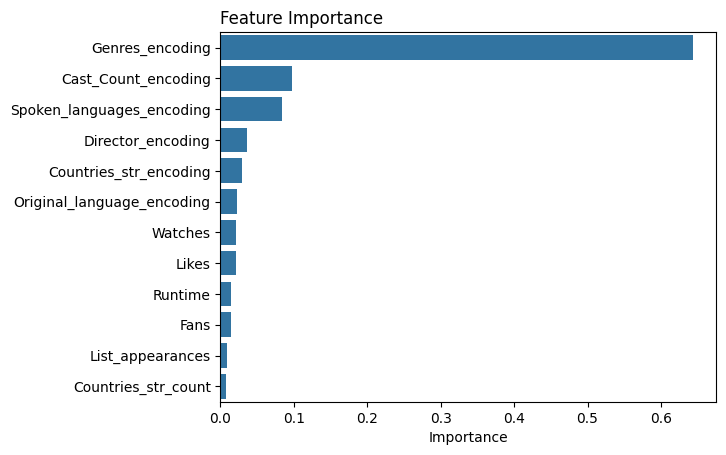

In [127]:
sns.barplot(x='Importance',y=X.columns,data=pd.DataFrame(best_xgb_model.feature_importances_,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False).reset_index())
plt.title("Feature Importance",loc='left')
plt.xlabel("Importance")
plt.ylabel("")
plt.show()

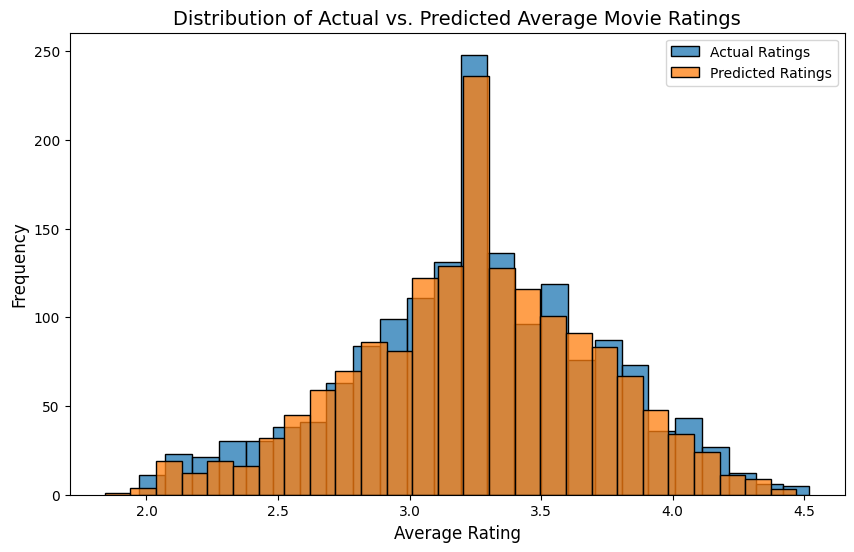

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Ratings')
sns.histplot(y_pred_tuned, label='Predicted Ratings')
plt.title('Distribution of Actual vs. Predicted Average Movie Ratings', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

**Finalizing the Model and metrics explaination:**


**Understanding the Metrics:**

**Mean Squared Error (MSE):** This is the average of the squared differences between the predicted values and the actual values. A lower MSE indicates a better fit to the data. It penalizes larger errors more heavily due to the squaring.

**Root Mean Squared Error (RMSE):** This is the square root of the MSE. It has the same units as the target variable (Average\_rating in this case), making it easier to interpret than MSE. A lower RMSE means the model's predictions are closer to the actual values on average.

**R-squared (R²):** This metric represents the proportion of the variance in the dependent variable (Average\_rating) that is predictable from the independent variables (features). It ranges from 0 to 1.
*   An R-squared of 0 means the model does not explain any of the variability in the target variable.
*   An R-squared of 1 means the model explains all the variability in the target variable.
*   A higher R-squared indicates a better fit and that the model explains more of the variance in the average rating.

**Comparing the Models:**

Let's look at the metrics for each model:

   **Linear Regression:**
       *   MSE: 0.186
       *   RMSE: 0.431
       *   R-squared: 0.183 (Explains about 18.3% of the variance)

**Decision Tree Regressor:**
     *   MSE: 0.136
     *   RMSE: 0.368
     *   R-squared: 0.403 (Explains about 40.3% of the variance)

   **Random Forest Regressor:**
     *   MSE: 0.067
     *   RMSE: 0.259
     *   R-squared: 0.704 (Explains about 70.4% of the variance)

   **XGBoost Regressor:**
     *   MSE: 0.053
     *   RMSE: 0.231
     *   R-squared: 0.766 (Explains about 76.6% of the variance)

 **Which Model is Better?**

 Based on all three metrics, the **XGBoost Regressor** is the best performing model among the ones you trained:

 *   It has the **lowest MSE (0.053)**, indicating the smallest average squared error in predictions.
 *   It has the **lowest RMSE (0.231)**, meaning its predictions are closest to the actual average ratings on average.
 *   It has the **highest R-squared (0.766)**, signifying that it explains the largest proportion (about 76.6%) of the variance in the average movie ratings.

 The models improve in performance in the following order: Linear Regression < Decision Tree Regressor < Random Forest Regressor < XGBoost Regressor.

 The simple Linear Regression performs the worst, explaining only a small portion of the variance. The Decision Tree is better, but the ensemble methods (Random Forest and XGBoost) significantly outperform the single tree and the linear model. XGBoost, a gradient boosting algorithm, achieves the best results, which is often the case with complex datasets due to its ability to capture non-linear relationships and interactions between features.

**Recommendation:**


**Rating Prediction for New/Unreleased Movies**

You can predict how a movie might be rated before it is released based on early buzz (likes, fans, etc.) or its attributes (genre, studio).

**Use Case:** Studios and platforms can make decisions about marketing spend or release windows.

**Targeted Improvements for Poorly Rated Movies:**

If a movie underperforms compared to its predicted rating, it could indicate:

Poor promotion

Misaligned audience expectations

Inaccurate metadata

**Use Case:** Diagnose why a movie failed and correct for future campaigns.

#**MOVIE SEGMENTATION**

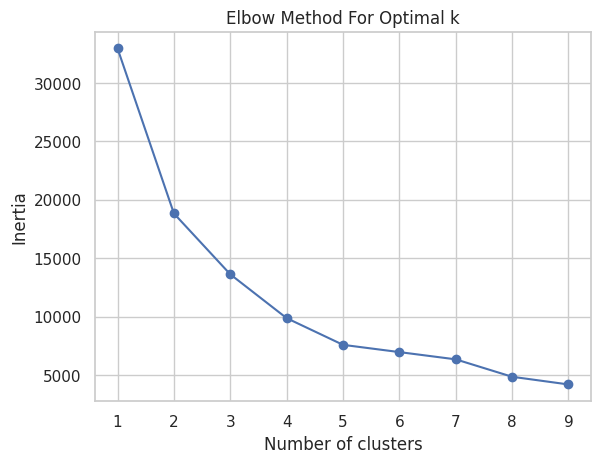

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numeric features related to engagement
features = Movie[['Watches', 'Likes', 'Fans', 'Average_rating']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use the Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Let's assume the elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict clusters on the scaled features
cluster_labels = kmeans.fit_predict(scaled_features)

# Create a DataFrame for the cluster labels, using the index from the original features DataFrame
cluster_df = pd.DataFrame({'Cluster': cluster_labels}, index=features.index)

if 'Cluster' in Movie.columns:
    Movie = Movie.drop('Cluster', axis=1)

# Rows that had missing values and were not included in 'features' will have NaN in the 'Cluster' column
Movie = Movie.merge(cluster_df, left_index=True, right_index=True, how='left')

# Review cluster characteristics
cluster_summary = Movie.dropna(subset=['Cluster']).groupby('Cluster')[['Watches', 'Likes', 'Fans', 'Average_rating']].mean()
print(cluster_summary)

              Watches         Likes          Fans  Average_rating
Cluster                                                          
0        5.134622e+04  6.535523e+03     67.373258        2.757737
1        1.055074e+06  2.907670e+05  12294.350806        3.749516
2        2.731591e+06  1.031487e+06  75562.500000        4.091250
3        6.686291e+04  1.591243e+04    457.736342        3.524851


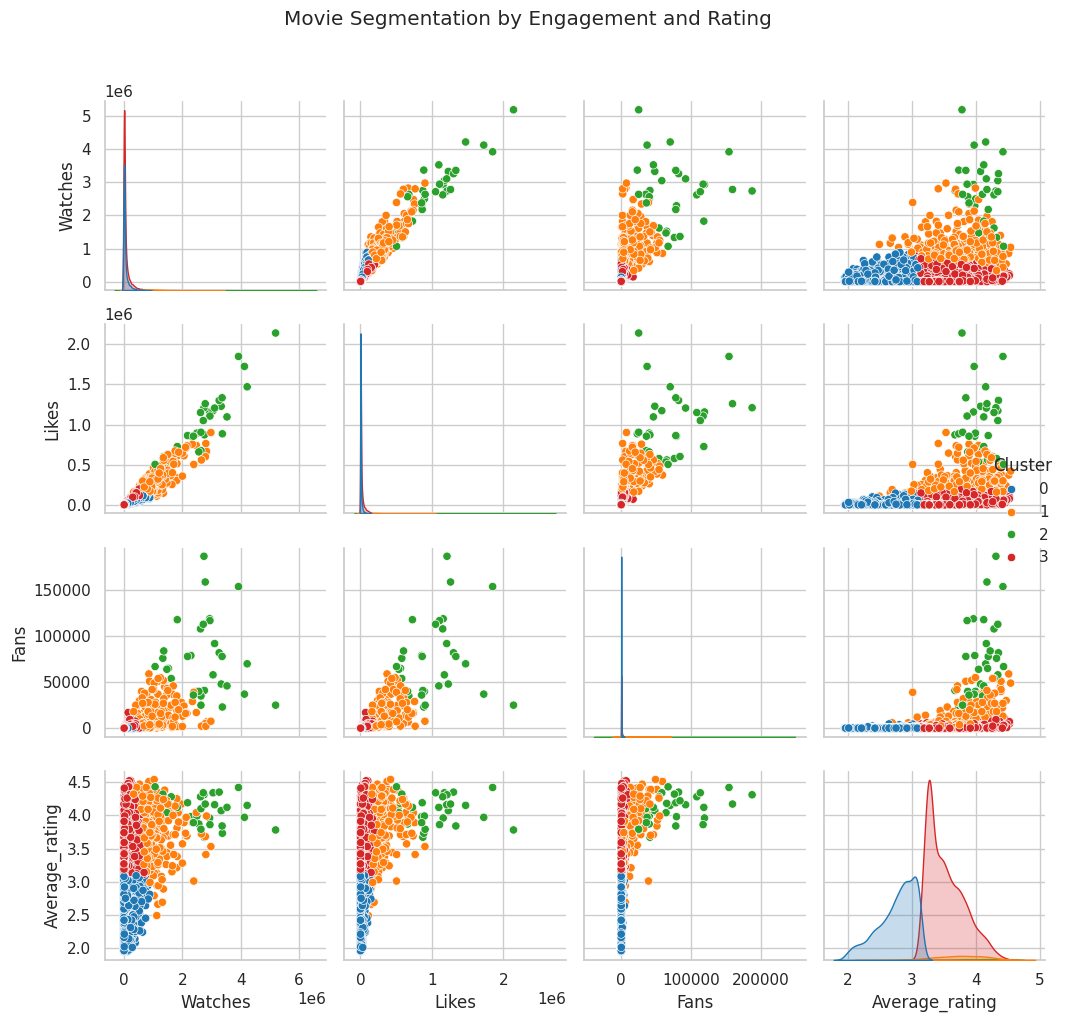

In [ ]:
plot_data = Movie[['Watches', 'Likes', 'Fans', 'Average_rating', 'Cluster']].dropna(subset=['Cluster']).copy()

# Convert the 'Cluster' column to integer type, as it was originally floats due to the merge
plot_data['Cluster'] = plot_data['Cluster'].astype(int)

sns.set(style="whitegrid")
# Use the plot_data DataFrame which contains both features and the 'Cluster' column
# Specify the variables to plot explicitly to avoid plotting 'Cluster' against itself
sns.pairplot(plot_data,
             vars=['Watches', 'Likes', 'Fans', 'Average_rating'], # Specify the features to plot
             hue='Cluster', # Use the Cluster column for coloring
             palette='tab10',
             diag_kind='kde')
plt.suptitle('Movie Segmentation by Engagement and Rating', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_features, cluster_labels) # Use the actual cluster labels

print(f"Silhouette Score for KMeans clustering: {sil_score:.3f}")

Silhouette Score for KMeans clustering: 0.449


**MODEL TUNING**

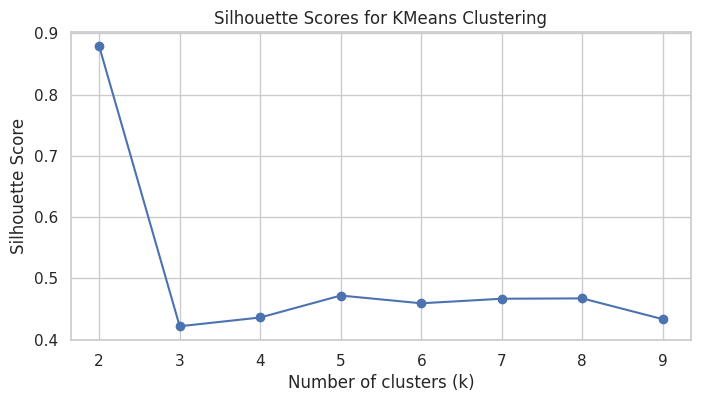


Optimal number of clusters based on Silhouette Score: 2
Highest Silhouette Score: 0.879

Silhouette Score for 2 clusters: 0.879

Tuned Cluster Summary:
                    Watches          Likes          Fans  Average_rating
Cluster_tuned                                                           
0              7.946595e+04   17002.555651    469.655405        3.244313
1              1.952190e+06  677649.031250  42804.166667        3.997083


<Figure size 640x480 with 0 Axes>

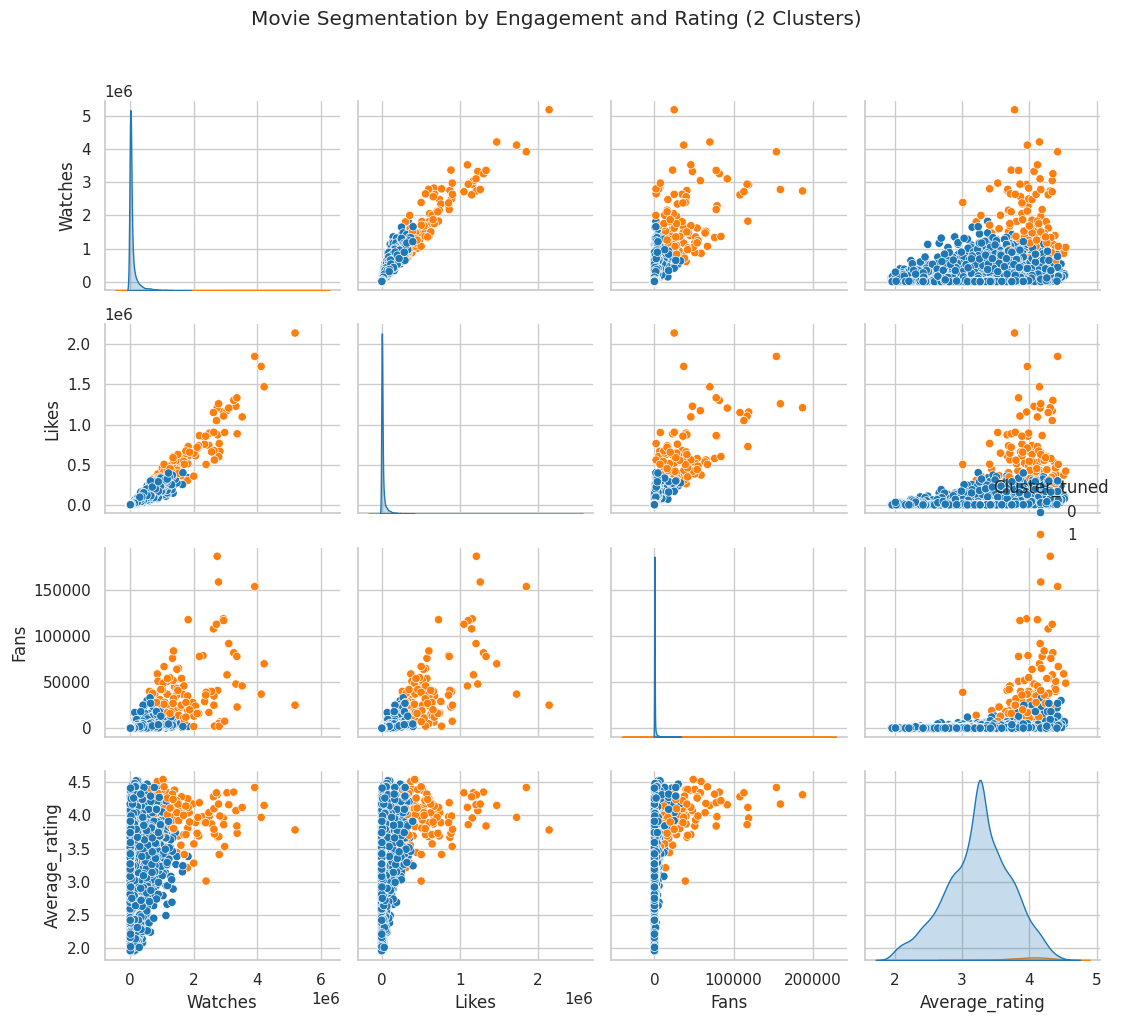

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported


# Select numeric features related to engagement
features_for_clustering = Movie[['Watches', 'Likes', 'Fans', 'Average_rating']].dropna()

# Normalize the data
scaler_clustering = StandardScaler()
scaled_features_clustering = scaler_clustering.fit_transform(features_for_clustering)

# Determine optimal number of clusters using Silhouette Score
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer KMeans versions
    # Fit on the scaled features derived from the DataFrame with dropped NaNs
    kmeans.fit(scaled_features_clustering)
    # Calculate silhouette score using the scaled features and the cluster labels
    score = silhouette_score(scaled_features_clustering, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal k based on the highest Silhouette Score
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")
print(f"Highest Silhouette Score: {np.max(silhouette_scores):.3f}")


# Now perform KMeans with the chosen optimal k (based on Silhouette or Elbow)
best_kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10)
# Fit on the scaled features derived from the DataFrame with dropped NaNs
best_kmeans.fit(scaled_features_clustering)
# Get cluster labels for the rows that were used for clustering
final_cluster_labels = best_kmeans.labels_

# Print the silhouette score for the chosen number of clusters
final_silhouette = silhouette_score(scaled_features_clustering, final_cluster_labels)
print(f"\nSilhouette Score for {optimal_k_silhouette} clusters: {final_silhouette:.3f}")


# Create a DataFrame for the cluster labels, using the index from the original features DataFrame
cluster_df_final = pd.DataFrame({'Cluster_tuned': final_cluster_labels}, index=features_for_clustering.index)

# Drop the old 'Cluster' column if it exists before merging the new one
if 'Cluster' in Movie.columns:
    Movie = Movie.drop('Cluster', axis=1)

# Merge the new cluster labels back into the main DataFrame
Movie = Movie.merge(cluster_df_final, left_index=True, right_index=True, how='left')

# Review cluster characteristics for the tuned clustering
cluster_summary_tuned = Movie.dropna(subset=['Cluster_tuned']).groupby('Cluster_tuned')[['Watches', 'Likes', 'Fans', 'Average_rating']].mean()
print("\nTuned Cluster Summary:")
print(cluster_summary_tuned)

# Plot the tuned clusters
plot_data_tuned = Movie[['Watches', 'Likes', 'Fans', 'Average_rating', 'Cluster_tuned']].dropna(subset=['Cluster_tuned']).copy()
plot_data_tuned['Cluster_tuned'] = plot_data_tuned['Cluster_tuned'].astype(int)

plt.figure() # Create a new figure for this plot
sns.set(style="whitegrid")
sns.pairplot(plot_data_tuned,
             vars=['Watches', 'Likes', 'Fans', 'Average_rating'],
             hue='Cluster_tuned',
             palette='tab10',
             diag_kind='kde')
plt.suptitle(f'Movie Segmentation by Engagement and Rating ({optimal_k_silhouette} Clusters)', y=1.02)
plt.tight_layout()
plt.show()

**Personalized Recommendation:**

Streaming platforms can recommend:

High-rated, low-watch films to users who prefer critically acclaimed content.

Popular blockbusters to users who prefer crowd favorites.

Niche content to fans of specific clusters.

**Model behavior:** Collaborative filtering and content-based recommenders can be improved by integrating these segment tags.

**Audience Insights & Content Strategy:**

By grouping movies into distinct segments based on Watches, Likes, Fans, and Ratings, you can understand:

Which movies attract high viewership despite poor ratings (mainstream hits).

Which movies are highly rated but under-watched (hidden gems or niche appeal).

Which movies build a strong fan base regardless of likes (loyal cult followings).

**Real-world implication:** This will help platform tailor recommendations, market differently to each segment, or decide which genres to invest in.

